In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/subject-5/10015_10063.csv
/kaggle/input/subject-5/10015_10063.tsv
/kaggle/input/subject-4/10012_22912.tsv
/kaggle/input/subject-4/10012_22912.csv
/kaggle/input/testfinal/10000_17728 (1).tsv
/kaggle/input/subject3/10003_26038.csv
/kaggle/input/subject3/10003_26038 (1).tsv
/kaggle/input/sleep-stage/10006_20647.csv
/kaggle/input/testannotation/10000_17728.csv
/kaggle/input/annotation/10006_20647 (1).tsv


# Read csv

In [4]:
# df=pd.read_csv('/kaggle/input/subject3/10003_26038.csv')
# df=pd.read_csv('/kaggle/input/subject-5/10015_10063.csv')
df=pd.read_csv('/kaggle/input/testannotation/10000_17728.csv')
# df=pd.read_csv('/kaggle/input/9955-18184/9955_18184.csv')
# df=pd.read_csv('/kaggle/input/9931-17578/9931_17578.csv')

print(df.isna().sum())
df_og = df

EOG LOC-M2         0
EOG ROC-M1         0
EMG Chin2-Chin1    0
EEG F3-M2          0
EEG F4-M1          0
EEG C3-M2          0
EEG C4-M1          0
EEG O1-M2          0
EEG O2-M1          0
EEG CZ-O1          0
EMG LLeg-RLeg      0
ECG EKG2-EKG       0
Snore              0
Resp PTAF          0
Resp Airflow       0
Resp Thoracic      0
Resp Abdominal     0
SpO2               0
Rate               0
EtCO2              0
Capno              0
Resp Rate          0
C-flow             0
Tidal Vol          0
Pressure           0
dtype: int64


In [11]:
n = len(df)
n

9109504

## remove rows with "sleep stage ?"

In [ ]:
df = df_og

In [6]:
# n = len(df)
# df = df.iloc[0:8033528]
len(df)

9109504

In [ ]:
df.columns

In [ ]:
print(df.isna().sum())

In [ ]:
import pandas as pd


# Print maximum values of all columns
print("Maximum values of all columns:")
print(df.max())

# Print minimum values of all columns
print("\nMinimum values of all columns:")
print(df.min())


In [ ]:
from scipy.signal import savgol_filter
print(df.columns)
# Define the common window size
common_window_size = 512  # Approximately 2 seconds of data

# Apply the Moving Average filter to each column
smoothed_df = df.rolling(window=common_window_size, min_periods=1).mean()

# smoothed_ema = df.ewm(span=common_window_size, adjust=False).mean()

# # Define the smoothing parameters
# window_size = 513  # Must be odd and chosen based on your data's characteristics
# poly_order = 2   # Polynomial order for Savitzky-Golay filter

# # Apply Savitzky-Golay Filter to each column
# smoothed_sg = df.apply(lambda x: savgol_filter(x, window_size, poly_order))


In [ ]:
# df=df.drop(columns=['Patient Event'])
from sklearn.preprocessing import StandardScaler

# Select the columns to be standardized
columns_to_standardize = ['Patient Event', 'EOG LOC-M2', 'EOG ROC-M1', 'EMG Chin1-Chin2',
       'EEG F3-M2', 'EEG F4-M1', 'EEG C3-M2', 'EEG C4-M1', 'EEG O1-M2',
       'EEG O2-M1', 'EEG CZ-O1', 'EMG LLeg-RLeg', 'ECG EKG2-EKG', 'Snore',
       'Resp PTAF', 'Resp Airflow', 'Resp Thoracic', 'Resp Abdominal', 'SpO2',
       'Rate', 'EtCO2', 'Capno', 'Resp Rate', 'C-flow', 'Tidal Vol',
       'Pressure']

# Initialize the StandardScaler
scaler = StandardScaler()


# Standardize the selected columns
smoothed_df[columns_to_standardize] = scaler.fit_transform(smoothed_df[columns_to_standardize])

In [ ]:
print(smoothed_df)

## Standardizing columns (MinMax scaling)

In [ ]:
w_df.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Select the columns to be standardized
columns_to_scale = 'EOG LOC-M2', 'EOG ROC-M1', 'EEG Chin1-Chin2', 'EEG F3-M2', 'EEG F4-M1',
       'EEG C3-M2', 'EEG C4-M1', 'EEG O1-M2', 'EEG O2-M1', 'EEG CZ-O1',
       'EMG LLeg-RLeg', 'ECG EKG2-EKG', 'Snore', 'Resp PTAF', 'Resp Airflow',
       'Resp Thoracic', 'Resp Abdominal', 'SpO2', 'Rate', 'Capno', 'Resp Rate',
       'C-flow', 'Tidal Vol', 'Pressure']
# 'EtCO2'

# Initialize the StandardScaler
# scaler = MinMaxScaler(feature_range=(0, 10))
scaler = RobustScaler()
robust_scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


# Scale the selected columns
# smoothed_df[columns_to_scale] = scaler.fit_transform(smoothed_df[columns_to_scale])
w_df[columns_to_scale] = scaler.fit_transform(w_df[columns_to_scale])

# Print the result to verify
print(r_df[columns_to_scale].head())


In [ ]:
# smoothed_df=smoothed_df.drop(columns=['Patient Event'])

In [ ]:
# data_converted=df['EEG F4-M1']
smoothed_df.shape
smoothed_df.head()
# smoothed_df=smoothed_df.drop(columns=['Patient Event'])

In [ ]:
smoothed_df.shape

# Feature Importance

## SHAP

In [ ]:
# df = df_og

In [ ]:
df.columns

In [ ]:
# anomalies_list = ['Oxygen Desaturation']
# anomaly = 'Oxygen Desaturation'

# # Filter annotations dataframe to include only 'Oxygen Desaturation'
# oxygen_desaturation_df = df1[df1['description'].isin(anomalies_list)]

# # Initialize the binary data list with zeros
# binary_data1 = [0] * len(df)

# # Iterate over each row in oxygen_desaturation_df
# for _, row in oxygen_desaturation_df.iterrows():
#     start_row = int(row['onset'] * 256)
#     end_row = int((row['onset'] + row['duration']) * 256)
#     # Mark intervals as 1
#     for i in range(start_row, end_row + 1):
#         if i < len(binary_data1):
#             binary_data1[i] = 1

# # Add the binary data as a new column to smoothed_df
# df['anomalies'] = binary_data1
# # smoothed_df['anomalies'] = binary_data1

# # Display the updated DataFrame
# print(df)

In [ ]:
len(n2_df),n2_df.columns,len(n2_df.columns)
len(n2_df[n2_df['anomalies'] == 1])

## RFC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Step 1: Create a balanced dataset
# anomaly_rows = df[df['anomalies'] == 1].sample(10000, random_state=42)
# non_anomaly_rows = df[df['anomalies'] == 0].sample(10000, random_state=42)

anomaly_rows = df[df['anomalies'] == 1].sample(10000, random_state=42)
non_anomaly_rows = df[df['anomalies'] == 0].sample(10000, random_state=42)

# Combine the anomaly and non-anomaly rows
balanced_df = pd.concat([anomaly_rows, non_anomaly_rows])

# Step 2: Prepare the data
X = balanced_df.drop(columns=['anomalies'])  # Features (drop the target column)
y = balanced_df['anomalies']  # Target variable

# Split the data into training and testing sets (optional, but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 4: Extract the Gini importance for each feature
importances = clf.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Gini Importance': importances
}).sort_values(by='Gini Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Create a SHAP explainer
# explainer = shap.Explainer(clf, X)

# # Calculate SHAP values (SHAP interaction values can also be calculated for more insights)
# shap_values = explainer(X)

# # Plot summary plot to show feature importance
# shap.summary_plot(shap_values, X)

# # You can also plot feature importance bar plot from SHAP values
# shap.summary_plot(shap_values, X, plot_type="bar")


## XG BOOST

In [ ]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# anomaly = 'Obstructive apnea'
# Step 1: Create a balanced dataset with 10,000 rows each of anomalous and non-anomalous data
# anomaly_rows = df[df['anomalies'] == 1].sample(10000, random_state=42)  # Anomalous rows
# non_anomaly_rows = df[df['anomalies'] == 0].sample(10000, random_state=42)  # Non-anomalous rows

anomaly_rows = n2_df[n2_df['anomalies'] == 1].sample(10000, random_state=42)
non_anomaly_rows = n2_df[n2_df['anomalies'] == 0].sample(10000, random_state=42)


# Combine the anomaly and non-anomaly rows into a single DataFrame
balanced_df = pd.concat([anomaly_rows, non_anomaly_rows])

# Shuffle the DataFrame to avoid any ordering bias
balanced_df = shuffle(balanced_df, random_state=42)

# Step 2: Prepare the features and target
X = balanced_df.drop('anomalies', axis=1)  # Features
y = balanced_df['anomalies']  # Target (0 = normal, 1 = anomaly)

# Step 3: Train the XGBoost classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X, y)

# Step 4: Plot feature importance
xgb.plot_importance(xgb_model)
plt.title(f'Feature Importance for {anomaly}')
plt.show()

# Step 5: Get feature importance as a DataFrame
feature_importance = xgb_model.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': feature_importance.keys(),
    'Importance': feature_importance.values()
}).sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(importance_df)


# EDA (anomaly list)

In [7]:
# df1=pd.read_csv('/kaggle/input/subject3/10003_26038 (1).tsv',sep='\t')
# df1=pd.read_csv('/kaggle/input/subject-5/10015_10063.tsv',sep='\t')
df1=pd.read_csv('/kaggle/input/testfinal/10000_17728 (1).tsv',sep='\t')
# df1=pd.read_csv('/kaggle/input/9955-18184-tsv/9955_18184.tsv',sep='\t')
# df1=pd.read_csv('/kaggle/input/9931-17578-tsv/9931_17578.tsv',sep='\t')


print(set(df1['description'].values))

{'Body Position: Right', 'kicking', 'CBG', 'Sleep stage W', 'sigh', 'EEG arousal', 'Recording Analyzer - ECG', 'sleep onset', 'Mixed Apnea', 'Body Position: Upright', 'Sleep stage N1', 'Oxygen Desaturation', 'crying and kicking', "mom in pt's bed", 'Sleep stage R', 'Montage:NCH_PSG_STANDARD', 'left foot stim', 'crying', 'cry and kicking', 'Central Apnea', 'Sleep stage N3', 'cry', 'not trying to correct belt signal to let pt sleep', 'Stopped Analyzer - Sleep Events', 'mom moved pt and adjusted covers', 'mom holding pt in bed', 'Started Analyzer - Sleep Events', 'right foot stim', 'Impedance at 5 kOhm', 'regained sleep', 'Video Recording ON', 'Started Analyzer - ECG', 'Body Position: Supine', 'mom rocking pt', 'Oximeter Event', 'Hypopnea', 'Obstructive Apnea', 'mom moved pt', 'stretching', 'Started Analyzer - Data Trends', 'REM', 'Body Position: Left', 'Start Recording', 'kicking and crying', 'crying kicking XXX around', "mom back in pt's bed", 'possible obstructive?', "mom leaving pt's 

In [8]:
# anomalies_list = [
#     'Central Apnea', 'Grit Teeth or Chew (5 seconds)', 'Breath Hold (10 seconds)',
#     'Simulate Snore or Hum (5 seconds)','Obstructive Apnea','Obstructive Hypopnea',
#     'Looking around', 'Eyes Up and Down X5',
#     'Mixed Apnea', 'Oral Breathing (10 seconds)', 'Oxygen Desaturation',
#     'Flex Right Foot', 'So', 'Flex Left Foot', 'Eye Blinks X5', 'Bruxism', 'Eyes Left and Right X5'
# ]
anomalies_list = ['Oxygen Desaturation']

# Assume df1 is your DataFrame containing the annotations
# Filter annotations dataframe to include only anomalies
anomalies_df = df1[df1['description'].isin(anomalies_list)]

# Initialize the binary data list with zeros
# binary_data1 = [0] * len(smoothed_df)
binary_data1 = [0] * len(df)

# Iterate over each row in anomalies_df
for _, row in anomalies_df.iterrows():
    start_row = int(row['onset'] * 256)
    end_row = int((row['onset'] + row['duration']) * 256)
    # Mark intervals as 1
    for i in range(start_row, end_row + 1):
        if i < len(binary_data1):
            binary_data1[i] = 1

# Add the binary data as a new column to smoothed_df
# smoothed_df['anomalies'] = binary_data1
df['anomalies'] = binary_data1

# Display the updated DataFrame
print(df.head())

   EOG LOC-M2  EOG ROC-M1  EMG Chin2-Chin1  EEG F3-M2  EEG F4-M1  EEG C3-M2  \
0   -0.000120   -0.001364        -0.001446   0.000410   0.000682   0.000894   
1    0.000682    0.000339        -0.000097   0.000610  -0.001239   0.000595   
2    0.000429    0.001837         0.001631   0.000093  -0.000696  -0.000637   
3   -0.000171   -0.000075         0.000403  -0.000008   0.000725  -0.000228   
4   -0.000230   -0.001785        -0.001557   0.000112   0.001068   0.000736   

   EEG C4-M1  EEG O1-M2  EEG O2-M1  EEG CZ-O1  ...  Resp Abdominal      SpO2  \
0  -0.000704   0.000717   0.000509  -0.001358  ...    3.967346e-07  0.002438   
1  -0.000368   0.000131  -0.001697   0.001344  ...   -4.577707e-07  0.002438   
2   0.000894  -0.000532  -0.000329   0.001881  ...    8.850233e-07  0.002438   
3   0.000341   0.000188   0.001445  -0.000691  ...   -3.051804e-08  0.002438   
4  -0.000763   0.000927   0.001524  -0.002000  ...    3.356985e-07  0.002438   

      Rate  EtCO2         Capno  Resp Rate  

In [ ]:
print(binary_data1.count(1))

## Grouping into sleep stages

In [ ]:
# Define the list of sleep stages
sleep_stages = ['Sleep stage W', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3','Sleep stage R']

# Initialize empty DataFrames for each sleep stage
w_df = pd.DataFrame()
n1_df = pd.DataFrame()
n2_df = pd.DataFrame()
n3_df = pd.DataFrame()
r_df = pd.DataFrame()

# Create a dictionary to map sleep stages to their respective DataFrames
sleep_stage_dfs = {
    'Sleep stage W': w_df,
    'Sleep stage N1': n1_df,
    'Sleep stage N2': n2_df,
    'Sleep stage N3': n3_df,
    'Sleep stage R':r_df
}

# Filter the annotations dataframe to include only rows for sleep stages
sleep_stage_df = df1[df1['description'].isin(sleep_stages)]

# Iterate over each row in sleep_stage_df
for _, row in sleep_stage_df.iterrows():
    start_row = int(row['onset'] * 256)  # Calculate the start row in smoothed_df
    end_row = int((row['onset'] + row['duration']) * 256)  # Calculate the end row in smoothed_df
    stage = row['description']  # Get the sleep stage (e.g., 'Sleep Stage W')
    
    # Get the corresponding rows from smoothed_df and append to the respective DataFrame
    stage_rows = df.iloc[start_row:end_row + 1]
    sleep_stage_dfs[stage] = pd.concat([sleep_stage_dfs[stage], stage_rows])




In [ ]:
# Now w_df, n1_df, n2_df, and n3_df will contain the corresponding rows from smoothed_df
w_df = sleep_stage_dfs['Sleep stage W']
n1_df = sleep_stage_dfs['Sleep stage N1']
n2_df = sleep_stage_dfs['Sleep stage N2']
n3_df = sleep_stage_dfs['Sleep stage N3']
r_df =  sleep_stage_dfs['Sleep stage R']

# Optionally, display the DataFrames for each sleep stage
print("W Stage DataFrame:")
print(w_df)
print("\nN1 Stage DataFrame:")
print(n1_df)
print("\nN2 Stage DataFrame:")
print(n2_df)
print("\nN3 Stage DataFrame:")
print(n3_df)
print("\nR Stage DataFrame:")
print(r_df)

In [ ]:
w_df.columns,len(w_df)

# minimum SpO2

In [7]:
print("Minimum SpO2 value for sleep stage W as an anomaly:")
min_SpO2_w = w_df[w_df['anomalies'] == 1]['SpO2'].min()
print(min_SpO2_w,w_df['SpO2'].min())

print("Minimum SpO2 value for sleep stage N1 as an anomaly:")
min_SpO2_n1 = n1_df[n1_df['anomalies'] == 1]['SpO2'].min()
print(min_SpO2_n1,n1_df['SpO2'].min())

print("Minimum SpO2 value for sleep stage N2 as an anomaly:")
min_SpO2_n2 = n2_df[n2_df['anomalies'] == 1]['SpO2'].min()
print(min_SpO2_n2,n2_df['SpO2'].min())

print("Minimum SpO2 value for sleep stage N3 as an anomaly:")
min_SpO2_n3 = n3_df[n3_df['anomalies'] == 1]['SpO2'].min()
print(min_SpO2_n3,n3_df['SpO2'].min())

print("Minimum SpO2 value for sleep stage R as an anomaly:")
min_SpO2_r = r_df[r_df['anomalies'] == 1]['SpO2'].min()
print(min_SpO2_r,r_df['SpO2'].min())

Minimum SpO2 value for sleep stage W as an anomaly:


NameError: name 'w_df' is not defined

In [ ]:
w_df = w_df[w_df['SpO2'] >= max(70,min_SpO2_w)].reset_index(drop=True)
n1_df = n1_df[n1_df['SpO2'] >= min_SpO2_n1].reset_index(drop=True)
n2_df = n2_df[n2_df['SpO2'] >= min_SpO2_n2].reset_index(drop=True)
n3_df = n3_df[n3_df['SpO2'] >= min_SpO2_n3].reset_index(drop=True)
r_df = r_df[r_df['SpO2'] >= min_SpO2_r].reset_index(drop=True)

# w_df = w_df[w_df['SpO2'] >= 78.58853130960594].reset_index(drop=True)
# n1_df = n1_df[n1_df['SpO2'] >= 0.0040582768556589].reset_index(drop=True)
# n2_df = n2_df[n2_df['SpO2'] >= 86.44941357899437].reset_index(drop=True)
# n3_df = n3_df[n3_df['SpO2'] >= 92.34203157339394].reset_index(drop=True)
# r_df = r_df[r_df['SpO2'] >= 92.34203157339394].reset_index(drop=True)

In [ ]:
len(n3_df),n3_df.columns

In [ ]:

# w_df = w_df.drop("EtCO2", axis='columns')
# n1_df = n1_df.drop("EtCO2", axis='columns')
# n2_df = n2_df.drop("EtCO2", axis='columns')
# n3_df = n3_df.drop("EtCO2", axis='columns')
# r_df = r_df.drop("EtCO2", axis='columns')

In [ ]:
df.shape

# FFT

## Wavelet signature

In [15]:
print(wavelet_features_df_selected.columns)

Index(['EEG F3-M2_feature_36', 'EEG F3-M2_feature_37', 'EEG F3-M2_feature_38',
       'EEG F3-M2_feature_39', 'EEG F3-M2_feature_40', 'EEG F3-M2_feature_41',
       'EEG F3-M2_feature_42', 'EEG F3-M2_feature_43', 'EEG F3-M2_feature_44',
       'EEG F3-M2_feature_45', 'EEG F3-M2_feature_46', 'EEG F3-M2_feature_47',
       'EEG F3-M2_feature_48', 'EEG F3-M2_feature_49', 'EEG F3-M2_feature_50',
       'EEG F3-M2_feature_51', 'EEG F3-M2_feature_52', 'EEG F3-M2_feature_53',
       'EEG F3-M2_feature_54', 'EEG F3-M2_feature_55', 'EEG F3-M2_feature_56',
       'EEG F3-M2_feature_57', 'EEG F3-M2_feature_58', 'EEG F3-M2_feature_59',
       'EEG F3-M2_feature_60', 'EEG F3-M2_feature_61', 'EEG F3-M2_feature_62',
       'EEG F3-M2_feature_63', 'EEG F3-M2_feature_64', 'EEG F3-M2_feature_65',
       'EEG F3-M2_feature_66', 'EEG F3-M2_feature_67', 'EEG F3-M2_feature_68',
       'EEG F3-M2_feature_69', 'EEG F3-M2_feature_70', 'EEG F3-M2_feature_71',
       'EEG F3-M2_feature_72', 'EEG F3-M2_feature_73

In [12]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.stats import entropy

def spectral_entropy(coeff):
    fft_vals = np.abs(fft(coeff))
    power_spectrum = fft_vals**2
    power_spectrum /= np.sum(power_spectrum)  # Normalize to create probabilities
    spec_entropy = entropy(power_spectrum)
    return spec_entropy

# Define the channels to analyze and sampling frequency
channels = ['EEG F3-M2']
sampling_frequency = 256  # Adjust according to your data

# Define function for Wavelet Packet Decomposition (WPD)
def wavelet_packet_decomposition(signal, wavelet='db1', maxlevel=3):
    wp = pywt.WaveletPacket(data=signal, wavelet=wavelet, maxlevel=maxlevel)
    nodes = [node.path for node in wp.get_level(maxlevel, 'freq')]
    features = {node: wp[node].data for node in nodes}
    return features

# Equalize the number of segments
anomalous_segments = df[df['anomalies'] == 1]
non_anomalous_segments = df[df['anomalies'] == 0].sample(len(anomalous_segments), random_state=42)

# Analyze each segment
anomalous_wpd_results = []
non_anomalous_wpd_results = []

for label, segments in [('Anomalous', anomalous_segments), ('Non-anomalous', non_anomalous_segments)]:
    for idx, row in segments.iterrows():
        segment_result = {}
        for channel in channels:
            # Apply WPD on each channel for the current segment
            signal = row[channel]
            wpd_features = wavelet_packet_decomposition(signal, wavelet='db4', maxlevel=4)

            # Calculate energy for each node in the wavelet packet tree without normalization
            energy = {node: np.sum(np.abs(coeff)**2) for node, coeff in wpd_features.items()}
            segment_result[f"{channel}_energy"] = energy

        # Store results based on anomaly label
        if label == 'Anomalous':
            anomalous_wpd_results.append(segment_result)
        else:
            non_anomalous_wpd_results.append(segment_result)

# Function to visualize energy distributions
def plot_energy_distribution(wpd_results, title):
    for channel in channels:
        plt.figure(figsize=(10, 6))
        for result in wpd_results:
            energy_values = list(result[f"{channel}_energy"].values())
            plt.plot(energy_values, label=f'{channel}')
        
        plt.title(f"{title} - Energy Distribution for {channel}")
        plt.xlabel("Wavelet Packet Nodes")
        plt.ylabel("Energy")
        plt.legend()
        plt.show()

# Visualize energy distributions for anomalous and non-anomalous segments
plot_energy_distribution(anomalous_wpd_results, title="Anomalous Segments")
plot_energy_distribution(non_anomalous_wpd_results, title="Non-anomalous Segments")


ValueError: Axis greater than data dimensions

In [13]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.stats import entropy

def spectral_entropy(coeff):
    fft_vals = np.abs(fft(coeff))
    power_spectrum = fft_vals**2
    power_spectrum /= np.sum(power_spectrum)  # Normalize to create probabilities for entropy calculation
    spec_entropy = entropy(power_spectrum)
    return spec_entropy

# Define the channels to analyze and sampling frequency
channels = ['EEG F3-M2']
sampling_frequency = 256  # Adjust according to your data

# Define function for Wavelet Packet Decomposition (WPD)
def wavelet_packet_decomposition(signal, wavelet='db1', maxlevel=3):
    # Ensure the signal is 1D and not empty
    if len(signal) == 0 or np.isnan(signal).any():
        raise ValueError("Invalid signal: empty or contains NaN values.")
    signal = np.asarray(signal).flatten()  # Flatten in case it's multidimensional

    wp = pywt.WaveletPacket(data=signal, wavelet=wavelet, maxlevel=maxlevel)
    nodes = [node.path for node in wp.get_level(maxlevel, 'freq')]
    features = {node: wp[node].data for node in nodes}
    return features

# Equalize the number of segments
anomalous_segments = df[df['anomalies'] == 1]
non_anomalous_segments = df[wavelet_featuresdf_selected['anomalies'] == 0].sample(len(anomalous_segments), random_state=42)

# Analyze each segment
anomalous_wpd_results = []
non_anomalous_wpd_results = []

for label, segments in [('Anomalous', anomalous_segments), ('Non-anomalous', non_anomalous_segments)]:
    for idx, row in segments.iterrows():
        segment_result = {}
        for channel in channels:
            # Apply WPD on each channel for the current segment
            signal = row[channel]
            if isinstance(signal, (list, np.ndarray)):
                try:
                    wpd_features = wavelet_packet_decomposition(signal, wavelet='db4', maxlevel=4)
                    energy = {node: np.sum(np.abs(coeff)**2) for node, coeff in wpd_features.items()}
                    segment_result[f"{channel}_energy"] = energy
                except ValueError as e:
                    print(f"Skipping segment at index {idx} due to error: {e}")
            else:
                print(f"Invalid data type for channel {channel} at index {idx}")

        # Store results based on anomaly label
        if label == 'Anomalous':
            anomalous_wpd_results.append(segment_result)
        else:
            non_anomalous_wpd_results.append(segment_result)

# Function to visualize energy distributions
def plot_energy_distribution(wpd_results, title):
    for channel in channels:
        plt.figure(figsize=(10, 6))
        for result in wpd_results:
            energy_values = list(result[f"{channel}_energy"].values())
            plt.plot(energy_values, label=f'{channel}')
        
        plt.title(f"{title} - Energy Distribution for {channel}")
        plt.xlabel("Wavelet Packet Nodes")
        plt.ylabel("Energy")
        plt.legend()
        plt.show()

# Visualize energy distributions for anomalous and non-anomalous segments
plot_energy_distribution(anomalous_wpd_results, title="Anomalous Segments")
plot_energy_distribution(non_anomalous_wpd_results, title="Non-anomalous Segments")


NameError: name 'wavelet_features_df_selected' is not defined

## Wavelet

In [1]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns for each channel and an 'anomalies' label column (0 = non-anomalous, 1 = anomalous)
channels = ['EEG CZ-O1']  # Adjust channels as needed
sampling_frequency = 256  # Adjust according to your data

# Define function for Wavelet Packet Decomposition (WPD)
def wavelet_packet_decomposition(signal, wavelet='db1', maxlevel=5):
    wp = pywt.WaveletPacket(data=signal, wavelet=wavelet, maxlevel=maxlevel)
    nodes = [node.path for node in wp.get_level(maxlevel, 'freq')]  # Get paths at maxlevel
    features = {node: wp[node].data for node in nodes}
    return features

# Segment data by anomaly label
anomalous_segments = df[df['anomalies'] == 1]
non_anomalous_segments = df[df['anomalies'] == 0].sample(n=len(anomalous_segments), random_state=34)  # Balance with anomalous count

# Analyze each segment
anomalous_wpd_results = []
non_anomalous_wpd_results = []

for label, segments in [('Anomalous', anomalous_segments), ('Non-anomalous', non_anomalous_segments)]:
    segment_result = {}

    for channel in channels:
        # Apply WPD on each channel for the current segment
        signal = segments[channel].values  # Convert to array for computation
        wpd_features = wavelet_packet_decomposition(signal, wavelet='db4', maxlevel=5)  # Example: 'db4', level 5

        # Calculate energy for each node in the wavelet packet tree (without normalization)
        energy = {node: np.sum(np.abs(coeff)**2) for node, coeff in wpd_features.items()}
        segment_result[f"{channel}_energy"] = energy

    # Store results based on anomaly label
    if label == 'Anomalous':
        anomalous_wpd_results.append(segment_result)
    else:
        non_anomalous_wpd_results.append(segment_result)

# Function to visualize energy distributions with anomalies in red and non-anomalies in blue
def plot_combined_energy_distribution(anomalous_wpd_results, non_anomalous_wpd_results, title):
    for channel in channels:
        plt.figure(figsize=(10, 6))
        
        # Flag for legend entries
        non_anomalous_plotted, anomalous_plotted = False, False
        
        # Plot non-anomalous segments in blue
        for result in non_anomalous_wpd_results:
            energy_values = list(result[f"{channel}_energy"].values())
            plt.plot(energy_values, color='blue', alpha=0.5, label='Non-anomalous' if not non_anomalous_plotted else "")
            non_anomalous_plotted = True
        
        # Plot anomalous segments in red
        for result in anomalous_wpd_results:
            energy_values = list(result[f"{channel}_energy"].values())
            plt.plot(energy_values, color='red', alpha=0.5, label='Anomalous' if not anomalous_plotted else "")
            anomalous_plotted = True

        plt.title(f"{title} - Energy Distribution for {channel}")
        plt.xlabel("Wavelet Packet Nodes")
        plt.ylabel("Energy")
        plt.legend()
        plt.show()

# Visualize combined energy distributions
plot_combined_energy_distribution(anomalous_wpd_results, non_anomalous_wpd_results, title="Combined Segments")


NameError: name 'df' is not defined

In [ ]:
import numpy as np
import pandas as pd
import pywt

# Example data structure
# Assuming df['SpO2'] has the SpO2 values and df['anomalies'] contains the anomaly labels
# Replace with your actual data loading
# df = pd.read_csv('your_data.csv')

# Example DataFrame for reference:
# df = pd.DataFrame({
#     'SpO2': np.random.normal(95, 1, 1000),  # Simulated SpO2 values
#     'anomalies': np.random.randint(0, 2, 1000)  # Random 0 or 1 anomalies
# })

# Wavelet Transform and Feature Extraction
def extract_wavelet_features(spo2_data, wavelet='db4', level=7):
    """
    Extract wavelet features from the SpO2 column using Discrete Wavelet Transform (DWT).
    
    :param spo2_data: Array of SpO2 values.
    :param wavelet: Wavelet type (e.g., 'db4').
    :param level: Decomposition level.
    :return: List of wavelet features.
    """
    # Perform discrete wavelet transform (DWT)
    coeffs = pywt.wavedec(spo2_data, wavelet, level=level)
    
    # Extract features from coefficients (e.g., mean, std, energy of each detail level)
    features = []
    for i, coeff in enumerate(coeffs):
        features.append(np.mean(coeff))   # Mean of the coefficients
        features.append(np.std(coeff))    # Standard deviation of the coefficients
        features.append(np.sum(coeff**2)) # Energy (sum of squared coefficients)
    
    return features

# Apply wavelet transform to each SpO2 segment
# Segment length can be defined as needed, assuming each row is a timestep
segment_length = 2560  # Example for 10 seconds with 256 Hz sampling rate
wavelet_features = []

for i in range(0, len(df), segment_length):
    segment = df['Snore'].iloc[i:i+segment_length].values
    
    if len(segment) == segment_length:  # Ensure the segment is complete
        features = extract_wavelet_features(segment)
        wavelet_features.append(features)

# Convert wavelet features into a DataFrame
wavelet_features_df = pd.DataFrame(wavelet_features, columns=[f'feature_{i}' for i in range(len(wavelet_features[0]))])

# Aligning with anomaly labels: 
# For each segment, assign the corresponding anomaly label (if more than 20% of the rows contain anomalies)
anomaly_labels = []

for i in range(0, len(df), segment_length):
    segment_anomalies = df['anomalies'].iloc[i:i+segment_length].values
    
    if len(segment_anomalies) == segment_length:
        # Label the segment as an anomaly if more than 20% of the rows are anomalies
        if np.sum(segment_anomalies) > 0.2 * segment_length:
            anomaly_labels.append(1)
        else:
            anomaly_labels.append(0)

# Add the anomaly labels to the wavelet feature DataFrame
wavelet_features_df['anomalies'] = anomaly_labels

# Show the final DataFrame with wavelet features and anomaly labels
print(wavelet_features_df.head(),len(wavelet_features_df))

# Now, the DataFrame `wavelet_features_df` contains wavelet features for each segment, 
# along with the corresponding anomaly label in the 'anomalies' column.

In [ ]:
df.columns

## wavelet for multiple cols

In [ ]:
import numpy as np
import pandas as pd
import pywt

# Example DataFrame for reference
# Assuming df['SpO2'] has the SpO2 values and df['anomalies'] contains the anomaly labels
# df = pd.DataFrame({
#     'EEG F3-M2': np.random.normal(95, 1, 1000),
#     'EEG F4-M1': np.random.normal(95, 1, 1000),
#     'EEG C3-M2': np.random.normal(95, 1, 1000),
#     'anomalies': np.random.randint(0, 2, 1000)
# })

# Wavelet Transform and Feature Extraction for a single channel
def extract_wavelet_features(channel_data, wavelet='db4', level=7):
    """
    Extract wavelet features from a signal using Stationary Wavelet Transform (SWT).
    
    :param channel_data: Array of signal values.
    :param wavelet: Wavelet type (e.g., 'db4').
    :param level: Decomposition level.
    :return: List of wavelet features.
    """
    # Perform Stationary Wavelet Transform (SWT)
    coeffs = pywt.swt(channel_data, wavelet, level=level)
    
    # Extract features from approximation and detail coefficients at each level
    features = []
    for cA, cD in coeffs:  # Separate approximation and detail coefficients
        # Extract features from detail coefficients (cD)
        features.append(np.mean(cD))   # Mean of detail coefficients
        features.append(np.std(cD))    # Standard deviation of detail coefficients
        features.append(np.sum(cD**2)) # Energy (sum of squared detail coefficients)
        
    return features

# Apply wavelet transform to each EEG segment for each channel
segment_length = 1280 #2560  # Example for 10 seconds with 256 Hz sampling rate
wavelet_features = []

for i in range(0, len(df), segment_length):
    segment = df[['EMG Chin2-Chin1']].iloc[i:i+segment_length]
    
    if len(segment) == segment_length:  # Ensure the segment is complete
        channel_features = []
        
        # Extract features for each channel independently
        for channel in segment.columns:
            channel_data = segment[channel].values
            features = extract_wavelet_features(channel_data)
            channel_features.extend(features)  # Add features for this channel
            
        wavelet_features.append(channel_features)

# Create column names to reflect multiple channels and features
num_features_per_channel = len(wavelet_features[0]) // len(segment.columns)
columns = [f'{col}_feature_{i}' for col in segment.columns for i in range(num_features_per_channel)]

# Convert wavelet features into a DataFrame with appropriate column names
wavelet_features_df = pd.DataFrame(wavelet_features, columns=columns)

# Aligning with anomaly labels: 
# For each segment, assign the corresponding anomaly label (if more than 20% of the rows contain anomalies)
anomaly_labels = []

for i in range(0, len(df), segment_length):
    segment_anomalies = df['anomalies'].iloc[i:i+segment_length].values
    
    if len(segment_anomalies) == segment_length:
        # Label the segment as an anomaly if more than 20% of the rows are anomalies
        if np.sum(segment_anomalies) > 0.5 * segment_length:
            anomaly_labels.append(1)
        else:
            anomaly_labels.append(0)

# Add the anomaly labels to the wavelet feature DataFrame
wavelet_features_df['anomalies'] = anomaly_labels

# Show the final DataFrame with wavelet features and anomaly labels
print(wavelet_features_df.head())

## Correct wavelet code

In [26]:
import numpy as np
import pandas as pd
import pywt
from scipy.fft import fft, fftfreq
from scipy.stats import entropy, skew, kurtosis

def spectral_entropy(coeff):
    # Perform Fourier Transform
    fft_vals = np.abs(fft(coeff))  # Take absolute values to get magnitudes
    power_spectrum = fft_vals**2
    power_spectrum /= np.sum(power_spectrum)  # Normalize to create probabilities
    spec_entropy = entropy(power_spectrum)
    return spec_entropy

def dominant_frequency(coeff, sampling_rate=256):
    freqs = fftfreq(len(coeff), 1 / sampling_rate)  # Frequency values
    fft_vals = fft(coeff)
    power_spectrum = np.abs(fft_vals)**2
    dom_freq = freqs[np.argmax(power_spectrum)]
    return dom_freq

def median_frequency(coeff, sampling_rate=256):
    freqs = fftfreq(len(coeff), 1 / sampling_rate)
    fft_vals = np.abs(fft(coeff)) ** 2
    cumulative_power = np.cumsum(fft_vals)
    total_power = cumulative_power[-1]
    return freqs[np.where(cumulative_power >= total_power / 2)[0][0]]

def bandwidth(coeff, sampling_rate=256):
    freqs = fftfreq(len(coeff), 1 / sampling_rate)
    fft_vals = np.abs(fft(coeff)) ** 2
    mean_freq = np.sum(freqs * fft_vals) / np.sum(fft_vals)
    return np.sqrt(np.sum(((freqs - mean_freq) ** 2) * fft_vals) / np.sum(fft_vals))

def spectral_skewness(coeff):
    fft_vals = np.abs(fft(coeff)) ** 2
    return skew(fft_vals)

def spectral_kurtosis(coeff):
    fft_vals = np.abs(fft(coeff)) ** 2
    return kurtosis(fft_vals)

def peak_frequency(coeff, sampling_rate=256):
    freqs = fftfreq(len(coeff), 1 / sampling_rate)
    fft_vals = np.abs(fft(coeff)) ** 2
    sorted_indices = np.argsort(fft_vals)[::-1]
    return freqs[sorted_indices[1]]

# Wavelet Transform and Feature Extraction for a single channel
def extract_wavelet_features(spo2_data, wavelet='db4', level=4):
    """
    Extract wavelet features from the SpO2 column using Discrete Wavelet Transform (DWT).
    
    :param spo2_data: Array of SpO2 values.
    :param wavelet: Wavelet type (e.g., 'db4').
    :param level: Decomposition level.
    :return: List of wavelet features.
    """
    coeffs = pywt.WaveletPacket(data=spo2_data, wavelet=wavelet, mode='symmetric', maxlevel=level)
    features = []
    for node in coeffs.get_level(level, order='freq'):
        coeff = node.data
        features.append(np.mean(coeff))   # Mean of the coefficients
        features.append(np.std(coeff))    # Standard deviation of the coefficients
        features.append(np.sum(coeff**2)) # Energy (sum of squared coefficients)
        features.append(dominant_frequency(coeff, sampling_rate=256))
        features.append(median_frequency(coeff))
        features.append(bandwidth(coeff))
        features.append(spectral_skewness(coeff))
        features.append(spectral_kurtosis(coeff))
        features.append(peak_frequency(coeff))
    return features

# Apply wavelet transform to each SpO2 segment for each channel
segment_length = 1280  # Example for 10 seconds with 256 Hz sampling rate
wavelet_features = []

# Assume 'df' is your DataFrame with SpO2 and anomaly labels
for i in range(0, len(df), segment_length):
    segment = df[['EEG F4-M1']].iloc[i:i+segment_length]  # Use selected columns, e.g., 'EEG F3-M2'
    if len(segment) == segment_length:  # Ensure the segment is complete
        channel_features = []
        
        # Extract features for each channel independently
        for channel in segment.columns:
            channel_data = segment[channel].values
            features = extract_wavelet_features(channel_data)
            channel_features.extend(features)  # Add features for this channel
            
        wavelet_features.append(channel_features)

# Create column names to reflect multiple channels and features
num_features_per_channel = len(wavelet_features[0]) // len(segment.columns)
columns = [f'{col}_feature_{i}' for col in segment.columns for i in range(num_features_per_channel)]

# Convert wavelet features into a DataFrame with appropriate column names
wavelet_features_df = pd.DataFrame(wavelet_features, columns=columns)

# Aligning with anomaly labels: 
# For each segment, assign the corresponding anomaly label (if more than 20% of the rows contain anomalies)
anomaly_labels = []

for i in range(0, len(df), segment_length):
    segment_anomalies = df['anomalies'].iloc[i:i+segment_length].values
    if len(segment_anomalies) == segment_length:
        # Label the segment as an anomaly if more than 20% of the rows are anomalies
        if np.sum(segment_anomalies) > 0.2 * segment_length:
            anomaly_labels.append(1)
        else:
            anomaly_labels.append(0)

# Add the anomaly labels to the wavelet feature DataFrame
wavelet_features_df['anomalies'] = anomaly_labels

# Show the final DataFrame with wavelet features and anomaly labels
print(wavelet_features_df.head())


   EEG F4-M1_feature_0  EEG F4-M1_feature_1  EEG F4-M1_feature_2  \
0             0.000025             0.000548             0.000026   
1             0.000003             0.000509             0.000022   
2            -0.000005             0.000568             0.000028   
3            -0.000059             0.000641             0.000036   
4            -0.000041             0.000543             0.000025   

   EEG F4-M1_feature_3  EEG F4-M1_feature_4  EEG F4-M1_feature_5  \
0            65.488372          -128.000000            75.964739   
1            62.511628          -128.000000            75.818306   
2            62.511628          -128.000000            71.667495   
3            62.511628          -128.000000            68.165012   
4            62.511628           125.023256            68.767406   

   EEG F4-M1_feature_6  EEG F4-M1_feature_7  EEG F4-M1_feature_8  \
0             3.179241             8.581644           -65.488372   
1             4.546161            22.243820   

In [63]:
# Assuming each node generates 9 features per channel
features_per_node = 9
selected_nodes = range(7,8)  # Nodes 4 to 10
selected_columns = []

# Loop through each channel and select columns for nodes 4 to 10
for channel in segment.columns:
    for node in selected_nodes:
        # Calculate the starting index for the current node
        start_index = node * features_per_node
        # Select columns corresponding to the features of this node
        selected_columns.extend([f"{channel}_feature_{i}" for i in range(start_index, start_index + features_per_node)])

# Create a DataFrame with only the selected features for nodes 4 to 10
wavelet_features_df_selected = wavelet_features_df[selected_columns]

# If you need to keep the anomaly label, add it back to the selected DataFrame
wavelet_features_df_selected['anomalies'] = wavelet_features_df['anomalies']

# Show the resulting DataFrame
print(wavelet_features_df_selected.head())

   EEG F4-M1_feature_63  EEG F4-M1_feature_64  EEG F4-M1_feature_65  \
0              0.000096              0.002712              0.000633   
1              0.000119              0.002697              0.000627   
2              0.000131              0.002699              0.000628   
3              0.000116              0.002718              0.000636   
4              0.000082              0.002724              0.000639   

   EEG F4-M1_feature_66  EEG F4-M1_feature_67  EEG F4-M1_feature_68  \
0             62.511628            113.116279             63.198785   
1             62.511628            107.162791             62.501845   
2             62.511628            113.116279             62.919207   
3             62.511628            119.069767             64.095449   
4             62.511628            125.023256             65.234923   

   EEG F4-M1_feature_69  EEG F4-M1_feature_70  EEG F4-M1_feature_71  anomalies  
0              4.322739             17.118896             62.5116

/tmp/ipykernel_33/3146924596.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wavelet_features_df_selected['anomalies'] = wavelet_features_df['anomalies']


In [64]:
print(wavelet_features_df_selected)

      EEG F4-M1_feature_63  EEG F4-M1_feature_64  EEG F4-M1_feature_65  \
0             9.580402e-05              0.002712          6.331023e-04   
1             1.193102e-04              0.002697          6.269221e-04   
2             1.305623e-04              0.002699          6.280120e-04   
3             1.155254e-04              0.002718          6.363713e-04   
4             8.172428e-05              0.002724          6.387056e-04   
...                    ...                   ...                   ...   
7111          2.447951e-07              0.000090          6.998194e-07   
7112         -2.746290e-07              0.000090          6.906107e-07   
7113          1.031804e-06              0.000088          6.710847e-07   
7114          1.925590e-06              0.000087          6.483599e-07   
7115          3.869478e-06              0.000087          6.529405e-07   

      EEG F4-M1_feature_66  EEG F4-M1_feature_67  EEG F4-M1_feature_68  \
0                62.511628           

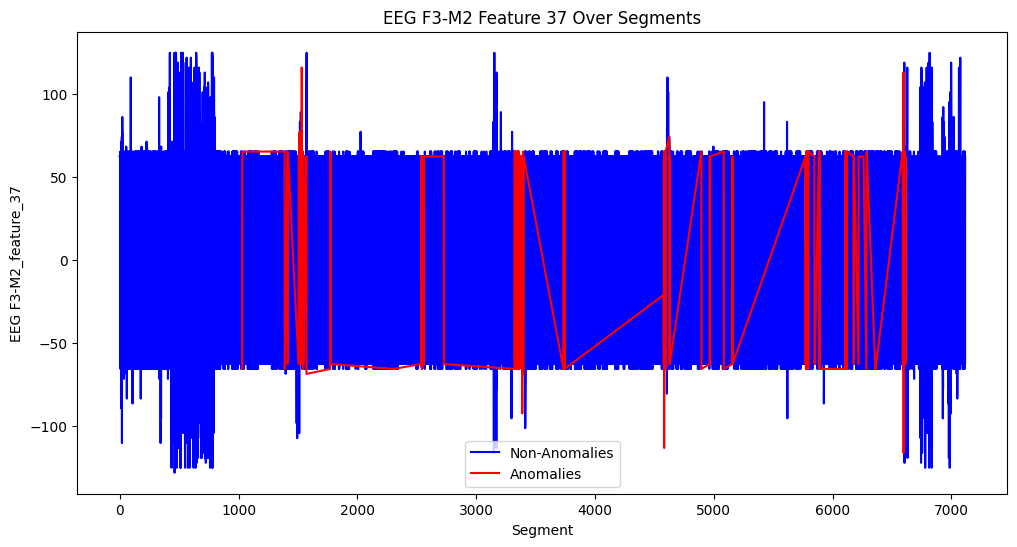

In [76]:
import matplotlib.pyplot as plt

# Separate data into anomalies and non-anomalies
anomalies = wavelet_features_df_selected[wavelet_features_df_selected['anomalies'] == 1]
non_anomalies = wavelet_features_df_selected[wavelet_features_df_selected['anomalies'] == 0]

# Plotting the specified feature column with different colors for anomalies and non-anomalies
plt.figure(figsize=(12, 6))
plt.plot(non_anomalies.index, non_anomalies['EEG F4-M1_feature_71'], 'b', label='Non-Anomalies')
plt.plot(anomalies.index, anomalies['EEG F4-M1_feature_71'], 'r', label='Anomalies')
plt.title('EEG F3-M2 Feature 37 Over Segments')
plt.xlabel('Segment')
plt.ylabel('EEG F3-M2_feature_37')
plt.legend()
plt.show()


In [31]:
print(wavelet_features_df_selected.shape)

(7116, 10)


In [ ]:
# non_anomalies = wavelet_features_df[wavelet_features_df['anomalies'] == 0]
# print(len(non_anomalies))
# anomalies = wavelet_features_df[wavelet_features_df['anomalies'] == 1]
# print(len(anomalies))
# wavelet_features_df.shape
wavelet_features_df.columns[:50]

## PCA

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming wavelet_features_df is your DataFrame with 7116 rows and 181 columns
# Drop the anomaly label column if present, as it's not a feature
features_df = wavelet_features_df.drop(columns=['anomalies'], errors='ignore')  # Drop label if exists

# Standardize the data (PCA requires standardized features)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# Apply PCA
pca = PCA()
pca.fit(scaled_features)

# Plot cumulative explained variance to determine optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of PCA Components')
plt.grid()
plt.show()

# Choose the number of components that explain ~95% variance
explained_variance_threshold = 0.95
n_components = next(i for i, cumulative_variance in enumerate(pca.explained_variance_ratio_.cumsum()) if cumulative_variance >= explained_variance_threshold) + 1

print(f"Number of components to retain 95% variance: {n_components}")

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
pca_features = pca.fit_transform(scaled_features)

# Convert the result back to a DataFrame for easy handling
pca_features_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(n_components)])

# Add the 'anomalies' label back to the reduced features, if it was present
if 'anomalies' in wavelet_features_df.columns:
    pca_features_df['anomalies'] = wavelet_features_df['anomalies'].reset_index(drop=True)

# Show the transformed DataFrame with the reduced number of features
print(pca_features_df.head())


## RFC

Balanced Accuracy for n=10: 0.7500
Classification Report for n=10:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



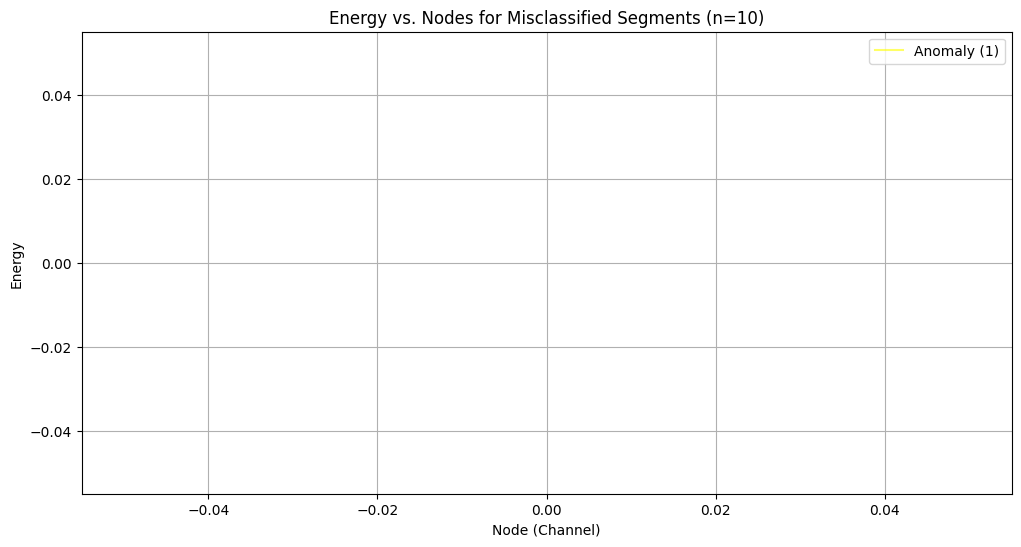

Balanced Accuracy for n=20: 0.8000
Classification Report for n=20:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.60      0.75         5

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8



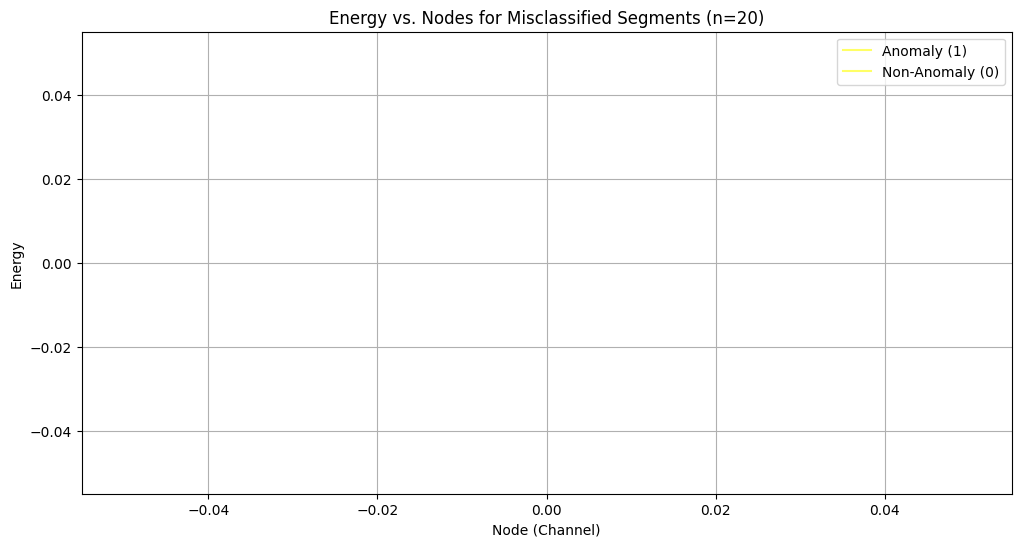

Balanced Accuracy for n=30: 0.5857
Classification Report for n=30:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.50      0.60      0.55         5

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12



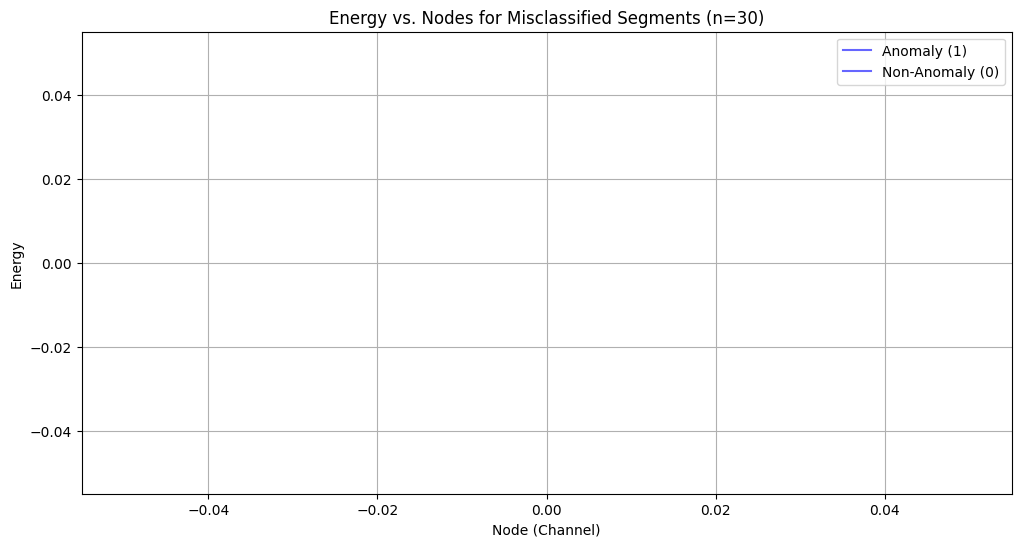

Balanced Accuracy for n=40: 0.7500
Classification Report for n=40:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.50      0.67         8

    accuracy                           0.75        16
   macro avg       0.83      0.75      0.73        16
weighted avg       0.83      0.75      0.73        16



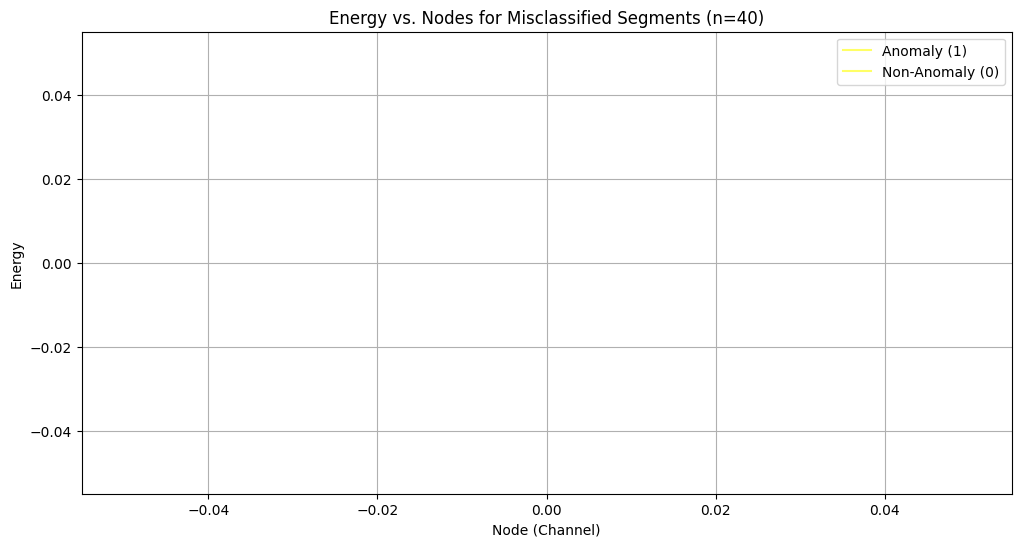

Balanced Accuracy for n=50: 0.5152
Classification Report for n=50:
               precision    recall  f1-score   support

           0       0.46      0.67      0.55         9
           1       0.57      0.36      0.44        11

    accuracy                           0.50        20
   macro avg       0.52      0.52      0.49        20
weighted avg       0.52      0.50      0.49        20



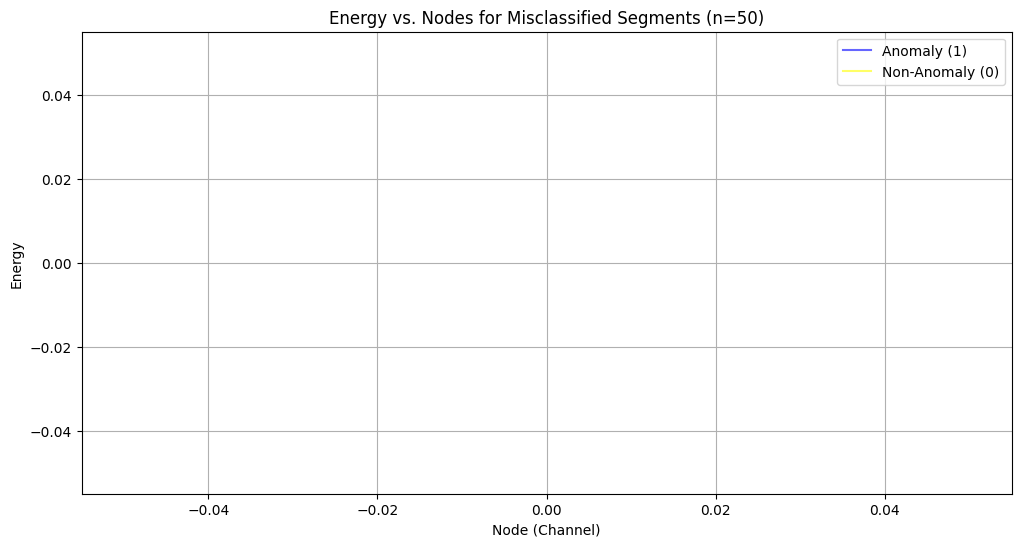

Balanced Accuracy for n=60: 0.6189
Classification Report for n=60:
               precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.60      0.55      0.57        11

    accuracy                           0.62        24
   macro avg       0.62      0.62      0.62        24
weighted avg       0.62      0.62      0.62        24



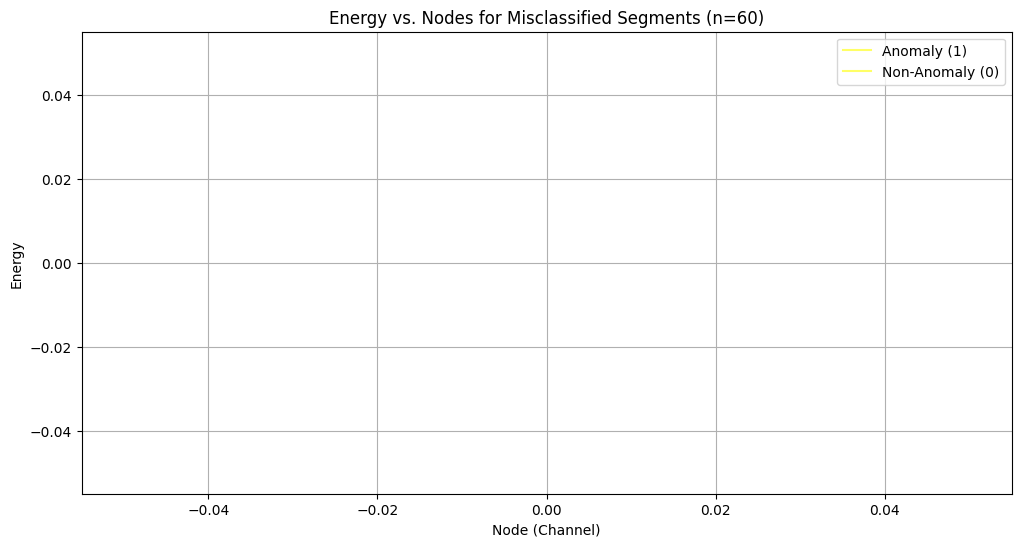

Balanced Accuracy for n=70: 0.5535
Classification Report for n=70:
               precision    recall  f1-score   support

           0       0.67      0.47      0.55        17
           1       0.44      0.64      0.52        11

    accuracy                           0.54        28
   macro avg       0.55      0.55      0.54        28
weighted avg       0.58      0.54      0.54        28



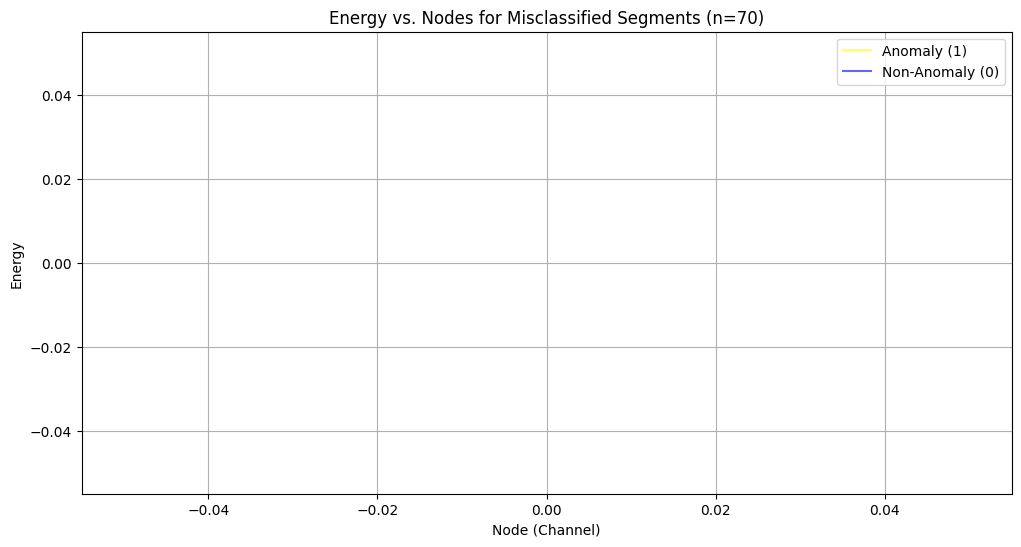

Balanced Accuracy for n=80: 0.4696
Classification Report for n=80:
               precision    recall  f1-score   support

           0       0.57      0.63      0.60        19
           1       0.36      0.31      0.33        13

    accuracy                           0.50        32
   macro avg       0.47      0.47      0.47        32
weighted avg       0.49      0.50      0.49        32



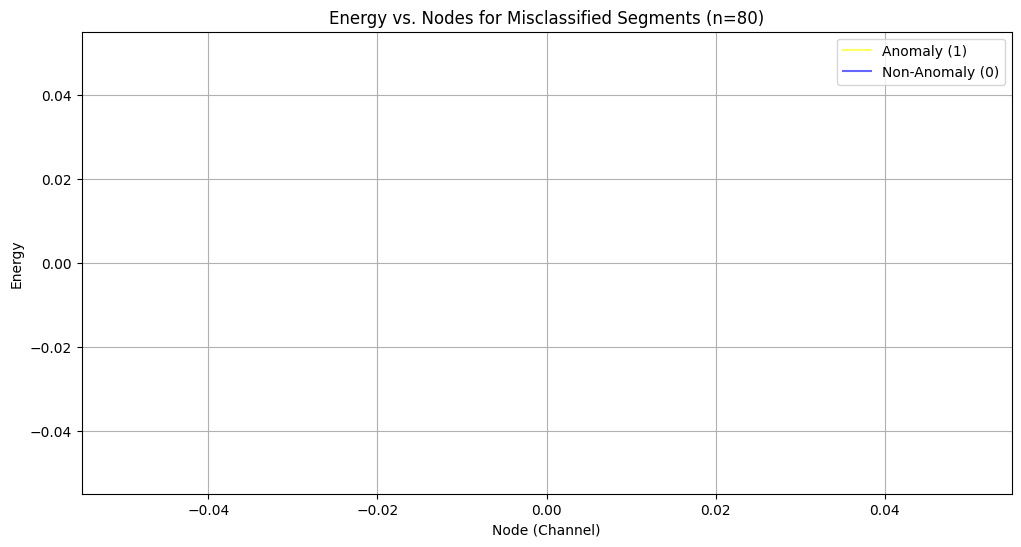

Balanced Accuracy for n=90: 0.6099
Classification Report for n=90:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63        19
           1       0.59      0.59      0.59        17

    accuracy                           0.61        36
   macro avg       0.61      0.61      0.61        36
weighted avg       0.61      0.61      0.61        36



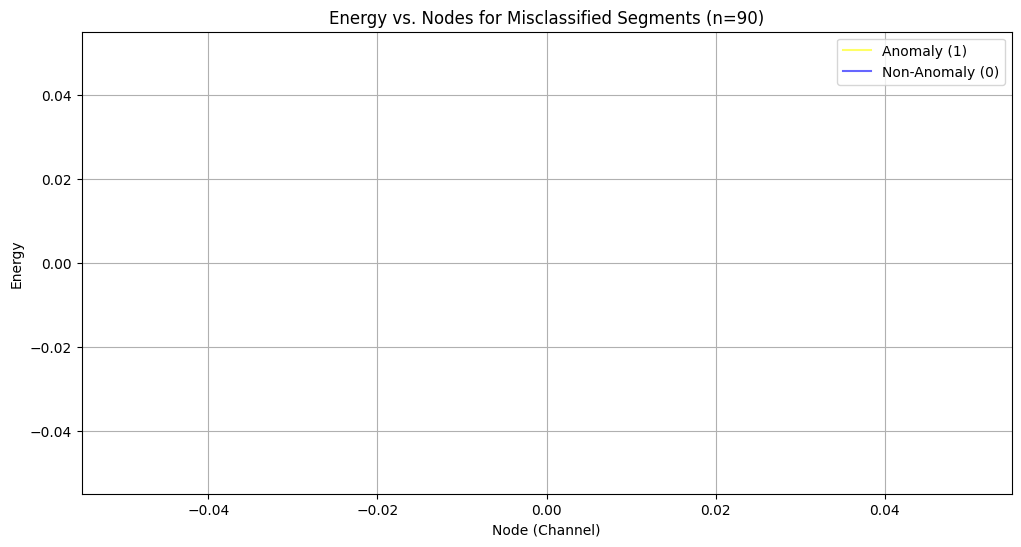

Balanced Accuracy for n=100: 0.4749
Classification Report for n=100:
               precision    recall  f1-score   support

           0       0.45      0.47      0.46        19
           1       0.50      0.48      0.49        21

    accuracy                           0.48        40
   macro avg       0.47      0.47      0.47        40
weighted avg       0.48      0.47      0.48        40



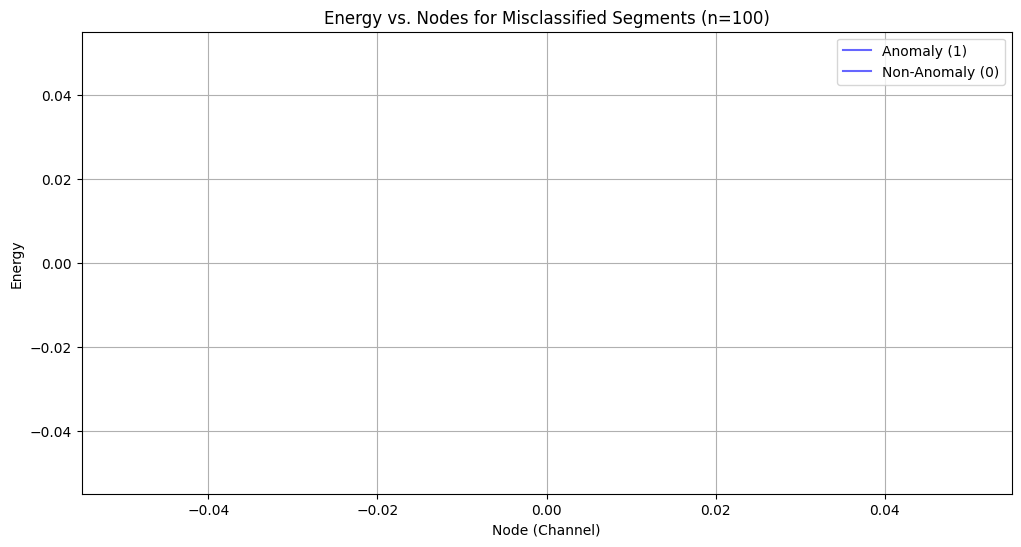

Balanced Accuracy for n=110: 0.6205
Classification Report for n=110:
               precision    recall  f1-score   support

           0       0.45      0.81      0.58        16
           1       0.80      0.43      0.56        28

    accuracy                           0.57        44
   macro avg       0.62      0.62      0.57        44
weighted avg       0.67      0.57      0.57        44



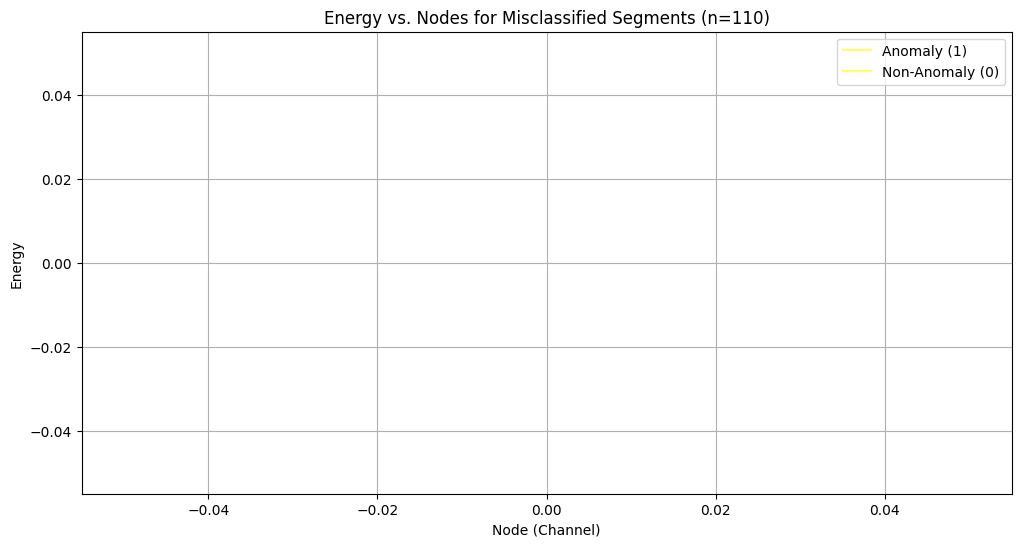

Balanced Accuracy for n=120: 0.4841
Classification Report for n=120:
               precision    recall  f1-score   support

           0       0.42      0.52      0.47        21
           1       0.55      0.44      0.49        27

    accuracy                           0.48        48
   macro avg       0.48      0.48      0.48        48
weighted avg       0.49      0.48      0.48        48



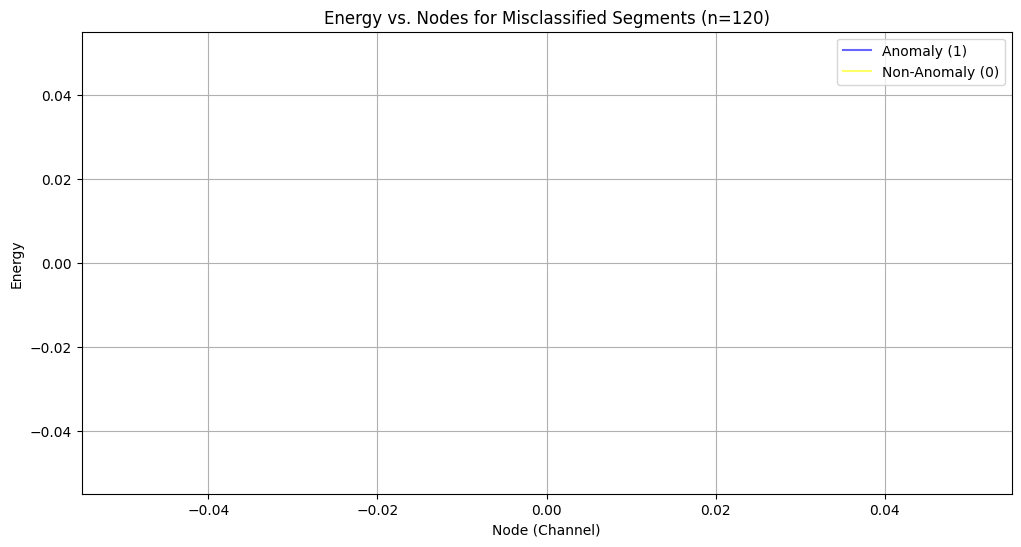

Balanced Accuracy for n=130: 0.4940
Classification Report for n=130:
               precision    recall  f1-score   support

           0       0.44      0.61      0.51        23
           1       0.55      0.38      0.45        29

    accuracy                           0.48        52
   macro avg       0.49      0.49      0.48        52
weighted avg       0.50      0.48      0.48        52



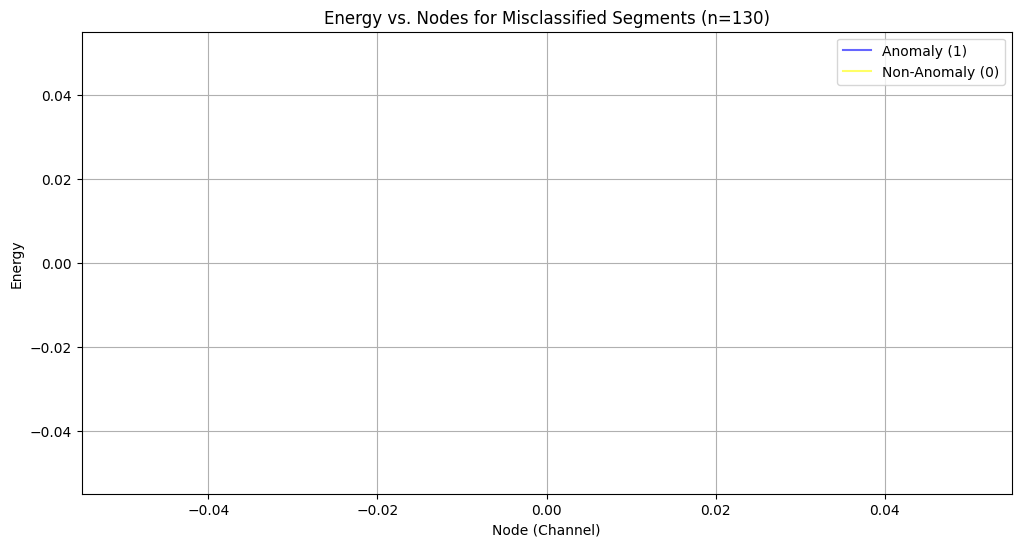

Balanced Accuracy for n=140: 0.4464
Classification Report for n=140:
               precision    recall  f1-score   support

           0       0.46      0.57      0.51        28
           1       0.43      0.32      0.37        28

    accuracy                           0.45        56
   macro avg       0.44      0.45      0.44        56
weighted avg       0.44      0.45      0.44        56



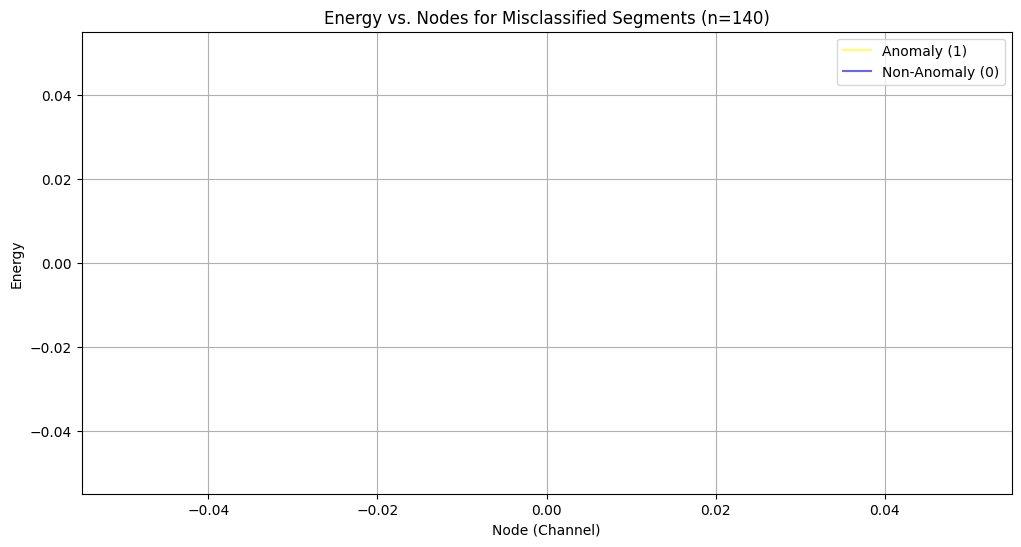

Balanced Accuracy for n=150: 0.4522
Classification Report for n=150:
               precision    recall  f1-score   support

           0       0.46      0.39      0.42        31
           1       0.44      0.52      0.48        29

    accuracy                           0.45        60
   macro avg       0.45      0.45      0.45        60
weighted avg       0.45      0.45      0.45        60



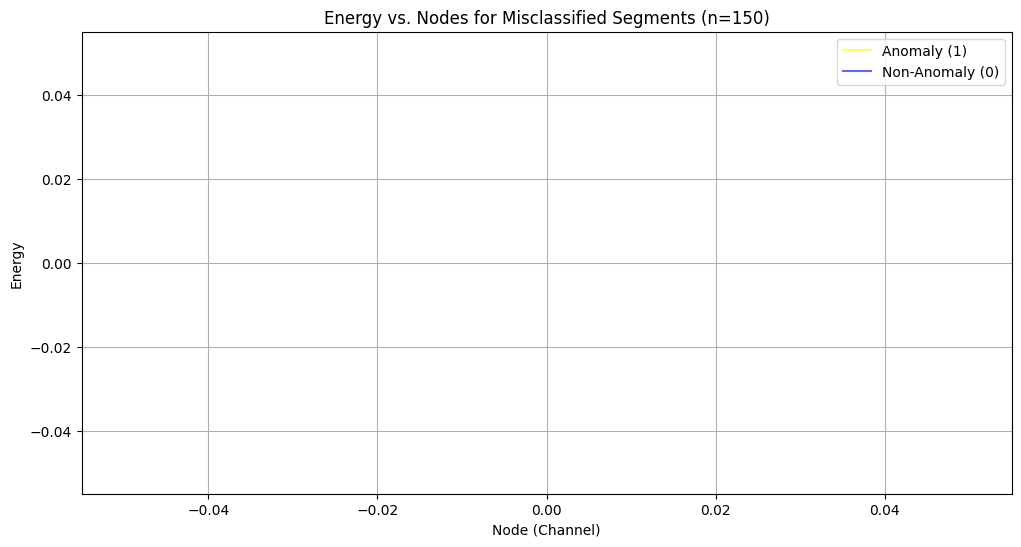

Balanced Accuracy for n=160: 0.6108
Classification Report for n=160:
               precision    recall  f1-score   support

           0       0.65      0.59      0.62        34
           1       0.58      0.63      0.60        30

    accuracy                           0.61        64
   macro avg       0.61      0.61      0.61        64
weighted avg       0.61      0.61      0.61        64



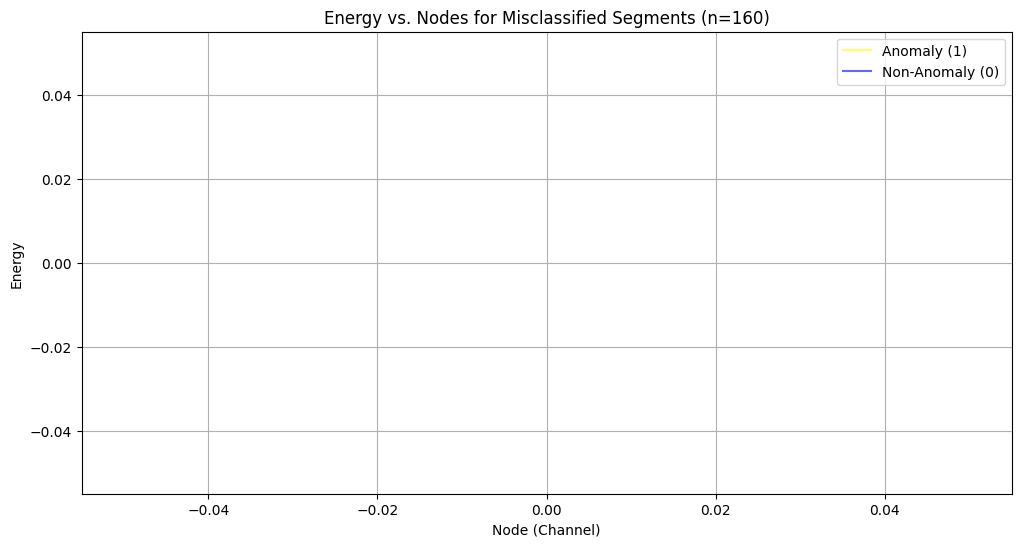

Balanced Accuracy for n=170: 0.5623
Classification Report for n=170:
               precision    recall  f1-score   support

           0       0.49      0.59      0.53        29
           1       0.64      0.54      0.58        39

    accuracy                           0.56        68
   macro avg       0.56      0.56      0.56        68
weighted avg       0.57      0.56      0.56        68



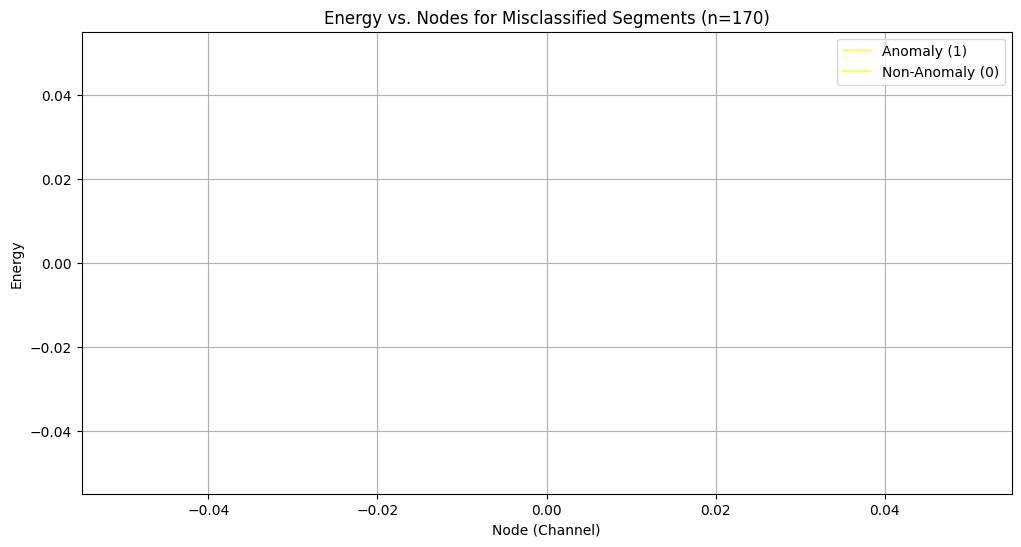

Balanced Accuracy for n=180: 0.5487
Classification Report for n=180:
               precision    recall  f1-score   support

           0       0.43      0.64      0.51        28
           1       0.67      0.45      0.54        44

    accuracy                           0.53        72
   macro avg       0.55      0.55      0.53        72
weighted avg       0.57      0.53      0.53        72



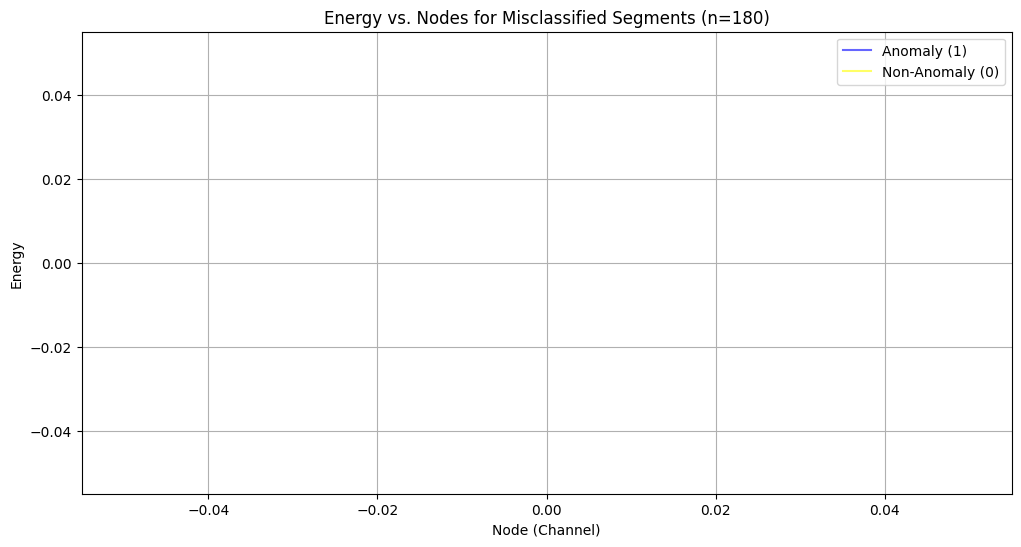

Balanced Accuracy for n=190: 0.5395
Classification Report for n=190:
               precision    recall  f1-score   support

           0       0.54      0.53      0.53        38
           1       0.54      0.55      0.55        38

    accuracy                           0.54        76
   macro avg       0.54      0.54      0.54        76
weighted avg       0.54      0.54      0.54        76



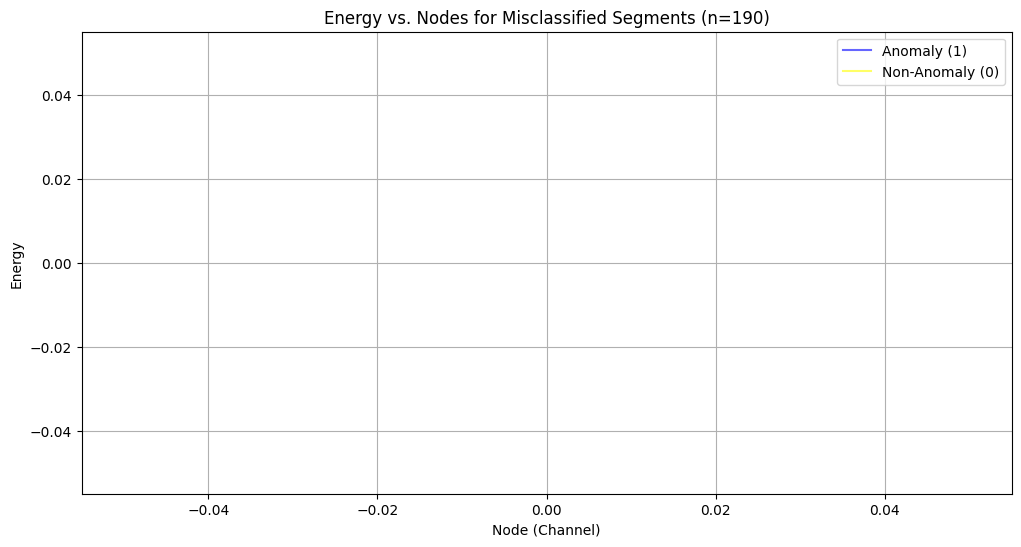

Balanced Accuracy for n=200: 0.5947
Classification Report for n=200:
               precision    recall  f1-score   support

           0       0.53      0.67      0.59        36
           1       0.66      0.52      0.58        44

    accuracy                           0.59        80
   macro avg       0.60      0.59      0.59        80
weighted avg       0.60      0.59      0.59        80



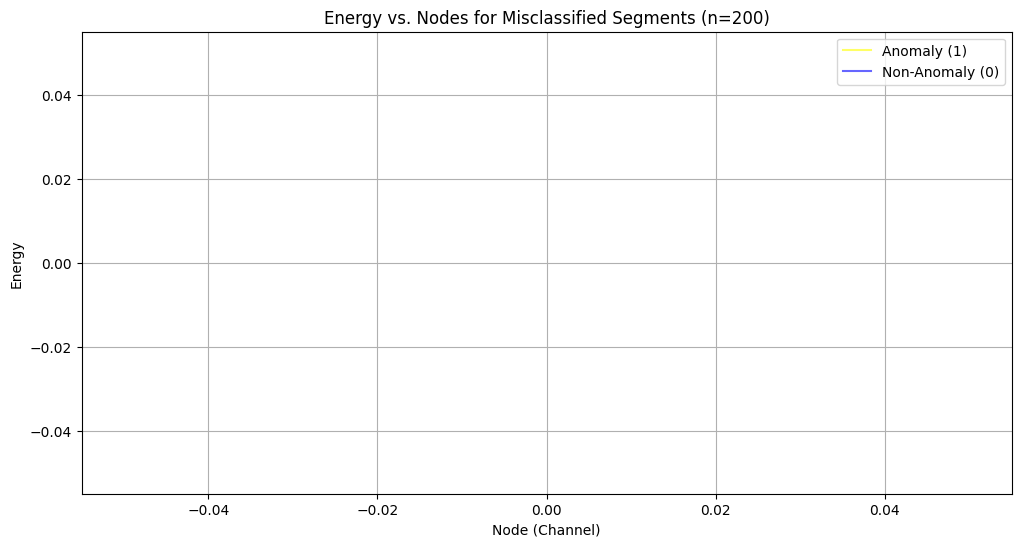

Balanced Accuracy for n=210: 0.5739
Classification Report for n=210:
               precision    recall  f1-score   support

           0       0.54      0.62      0.58        40
           1       0.61      0.52      0.56        44

    accuracy                           0.57        84
   macro avg       0.57      0.57      0.57        84
weighted avg       0.58      0.57      0.57        84



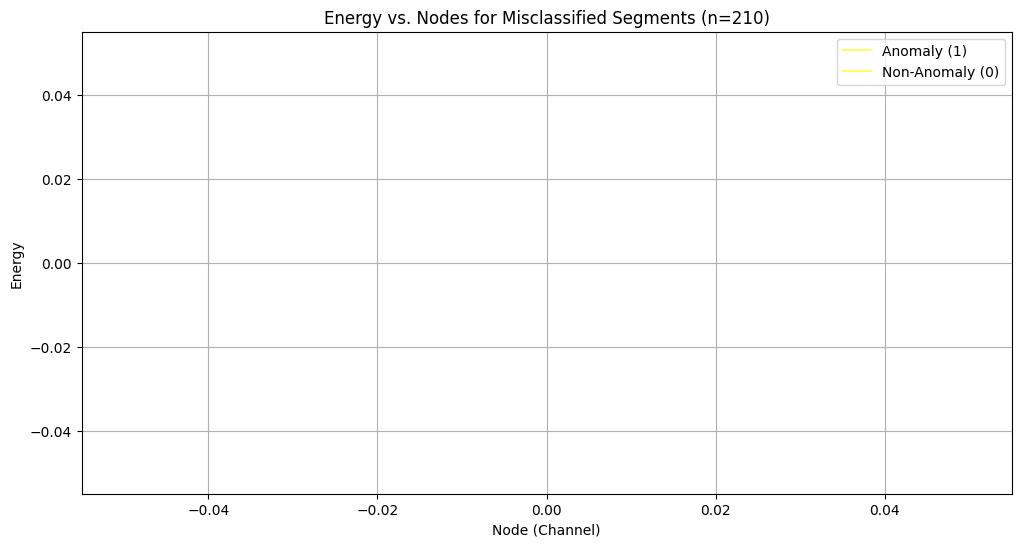

Balanced Accuracy for n=220: 0.5795
Classification Report for n=220:
               precision    recall  f1-score   support

           0       0.56      0.70      0.63        44
           1       0.61      0.45      0.52        44

    accuracy                           0.58        88
   macro avg       0.58      0.58      0.57        88
weighted avg       0.58      0.58      0.57        88



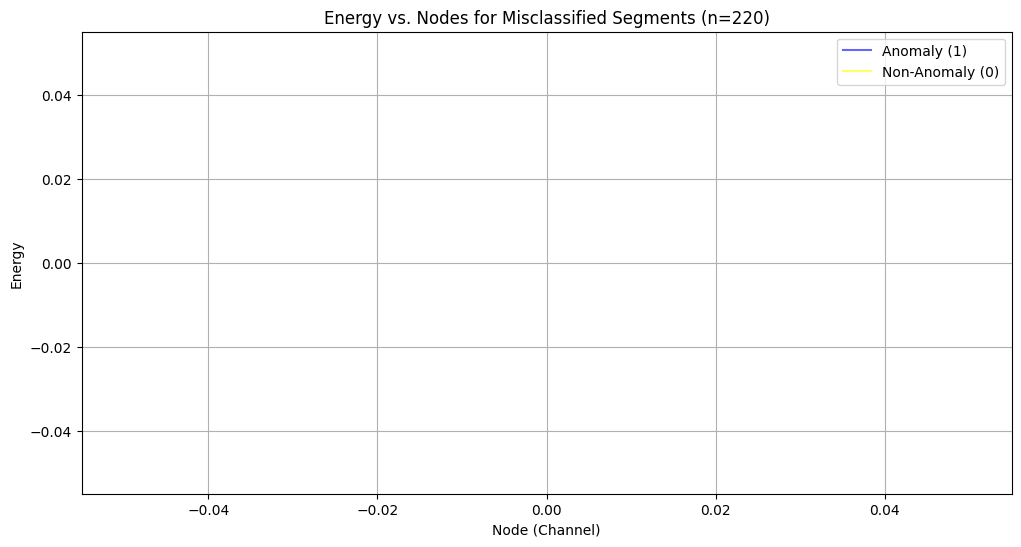

Balanced Accuracy for n=230: 0.5744
Classification Report for n=230:
               precision    recall  f1-score   support

           0       0.45      0.67      0.54        36
           1       0.69      0.48      0.57        56

    accuracy                           0.55        92
   macro avg       0.57      0.57      0.55        92
weighted avg       0.60      0.55      0.56        92



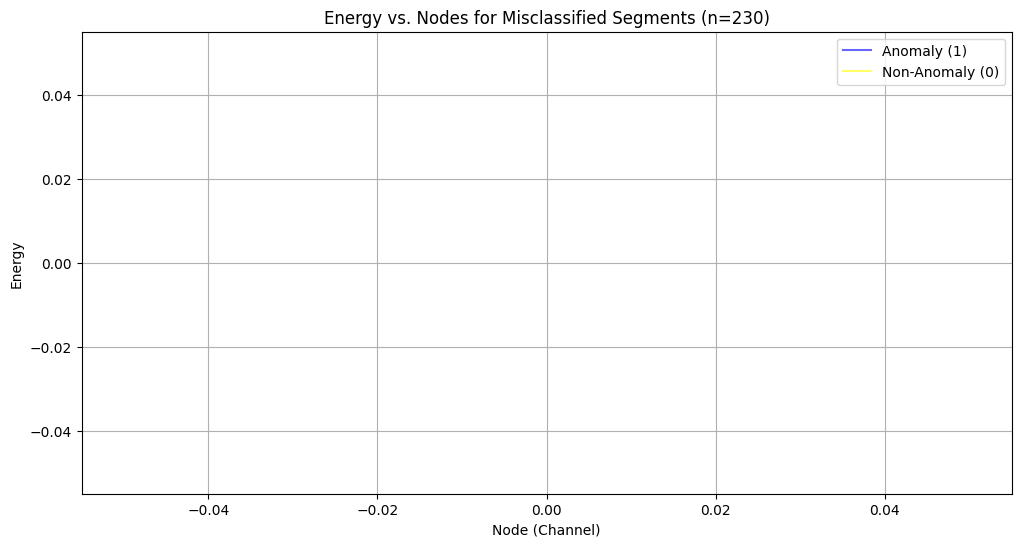

Balanced Accuracy for n=240: 0.6635
Classification Report for n=240:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67        44
           1       0.73      0.58      0.65        52

    accuracy                           0.66        96
   macro avg       0.67      0.66      0.66        96
weighted avg       0.67      0.66      0.66        96



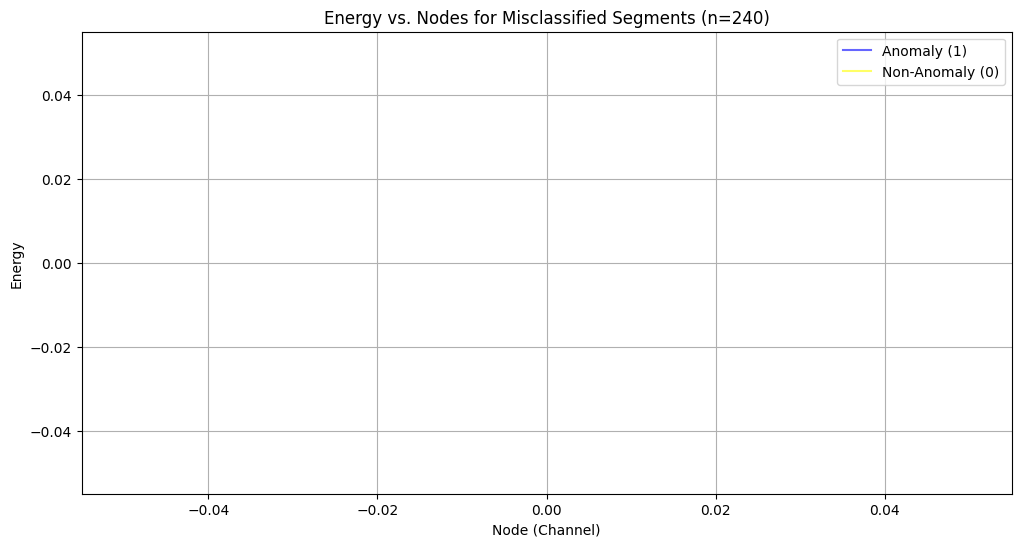

Balanced Accuracy for n=250: 0.5853
Classification Report for n=250:
               precision    recall  f1-score   support

           0       0.54      0.65      0.59        46
           1       0.64      0.52      0.57        54

    accuracy                           0.58       100
   macro avg       0.59      0.59      0.58       100
weighted avg       0.59      0.58      0.58       100



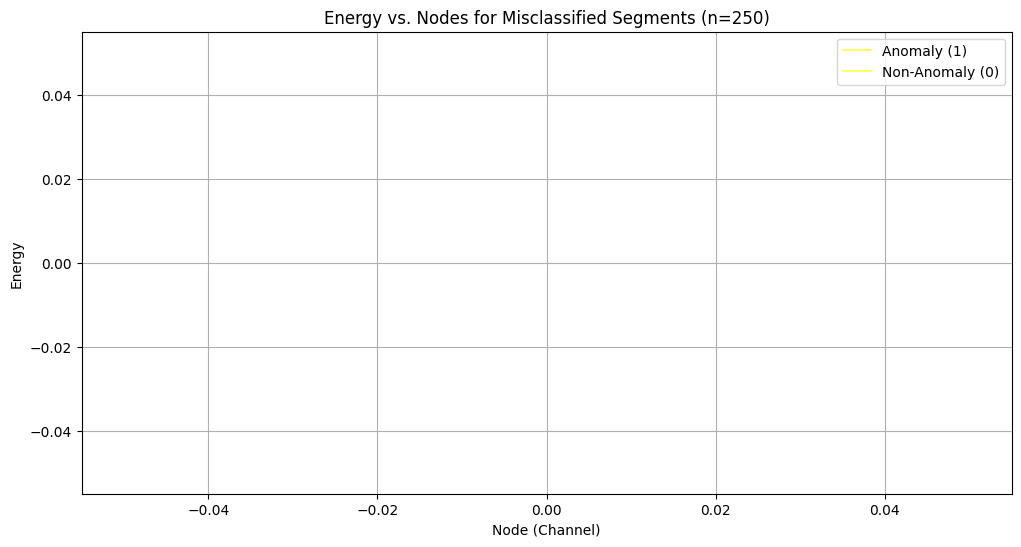

In [33]:
# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report

# Assuming wavelet_features_df is already defined and loaded with data
# Separate anomalies and non-anomalies
anomalies = wavelet_features_df_selected[wavelet_features_df_selected['anomalies'] == 1]
non_anomalies = wavelet_features_df_selected[wavelet_features_df_selected['anomalies'] == 0]
# anomalies = wavelet_features_df[wavelet_features_df['anomalies'] == 1]
# non_anomalies = wavelet_features_df[wavelet_features_df['anomalies'] == 0]

val = 35
# Loop through n values from 250 to 400 in increments of 10
for n in range(10,len(anomalies)-10,10):
    # Sample n anomalies and n non-anomalies
    anomalies_sample = anomalies.sample(n=n, random_state=val)
    non_anomalies_sample = non_anomalies.sample(n=n, random_state=val)

    # Concatenate the sampled data to create a balanced dataset
    balanced_data = pd.concat([anomalies_sample, non_anomalies_sample])

    # Define features and target variable
    X = balanced_data.drop(columns=['anomalies'])
    y = balanced_data['anomalies']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=val)

    # Initialize the Random Forest Classifier
    rfc = RandomForestClassifier(random_state=val)

    # Train the model
    rfc.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rfc.predict(X_test)

    # Calculate balanced accuracy
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    print(f"Balanced Accuracy for n={n}: {balanced_acc:.4f}")

    # Optional: Classification report
    print(f"Classification Report for n={n}:\n", classification_report(y_test, y_pred))
    print("="*50)
    
    # Identify misclassified samples
    misclassified_indices = X_test[y_test != y_pred].index
    misclassified_samples = X_test.loc[misclassified_indices]
    misclassified_labels = y_test.loc[misclassified_indices]

    # Plot Energy vs. Nodes for misclassified segments
    energy_columns = [col for col in X.columns if '_feature_2' in col]
    energy_values = misclassified_samples[energy_columns].values

    # Create plot
    plt.figure(figsize=(12, 6))
    for idx, (sample, label) in enumerate(zip(energy_values, misclassified_labels)):
        # Choose color based on the actual label
        color = 'yellow' if label == 1 else 'blue'
        plt.plot(range(len(energy_columns)), sample, label=f'Misclassified Sample {idx+1}', color=color, alpha=0.6)

    plt.xlabel('Node (Channel)')
    plt.ylabel('Energy')
    plt.title(f'Energy vs. Nodes for Misclassified Segments (n={n})')
    plt.legend(['Anomaly (1)', 'Non-Anomaly (0)'], loc='upper right')
    plt.grid(True)
    plt.show()

## FFT on segment

In [ ]:
import numpy as np
import pandas as pd
from scipy.fft import fft

# Assuming smoothed_n2_df is your DataFrame with all the relevant columns
# List of columns to process
columns_to_process = ['EOG LOC-M2', 'EOG ROC-M1', 'EMG Chin2-Chin1', 'EEG F3-M2', 'EEG F4-M1', 'EEG C3-M2', 
                      'EEG C4-M1', 'EEG O1-M2', 'EEG O2-M1', 'EEG CZ-O1', 'EMG LLeg-RLeg', 'ECG EKG2-EKG', 
                      'Snore', 'Resp PTAF', 'Resp Airflow', 'Resp Thoracic', 'Resp Abdominal', 'SpO2', 'Rate',  'Capno', 'Resp Rate', 'C-flow', 'Tidal Vol', 'Pressure']

# Parameters
segment_size = 1280  # 10 seconds segment (1280 rows)
anomaly_threshold = 0.10  # 10% anomaly threshold

# Lists to store results
feature_rows = []

# Loop through the data and segment it for each column
for start_idx in range(0, len(df), segment_size):
    end_idx = start_idx + segment_size
    
    # Ensure segment does not go out of bounds
    if end_idx > len(df):
        break
    
    # Store features for each column in this segment
    segment_features = {}
    
    # Loop through each column
    for col in columns_to_process:
        # Extract the data and annotations for the current column
        segment = df[col].iloc[start_idx:end_idx].values
        segment_annotations = df['anomalies'].iloc[start_idx:end_idx].values

        # Check if the segment contains more than 10% anomalies
        if np.mean(segment_annotations) > anomaly_threshold:
            segment_label = 1  # Anomalous
        else:
            segment_label = 0  # Non-anomalous

        # Apply FFT to the segment
        fft_segment = fft(segment)
        
        # Compute the frequency bins
        n = len(segment)
        freqs = np.fft.fftfreq(n)

        # Calculate the amplitude spectrum
        amplitude_segment = np.abs(fft_segment)
        # print(amplitude_segment.shape)

        # Extract the dominant frequency (excluding zero frequency)
        dominant_freq = freqs[np.argmax(amplitude_segment[1:n//2])]

        # Store features: dominant frequency, mean amplitude, and mean value
        segment_features[f'{col}_dominant_freq'] = dominant_freq
        segment_features[f'{col}_mean_amplitude'] = np.mean(amplitude_segment)  # Mean of the amplitude
        segment_features[f'{col}_mean_value'] = np.mean(segment)  # Mean of the original segment

    # Add the label
    segment_features['label'] = segment_label
    
    # Append to feature rows
    feature_rows.append(segment_features)

# Create a DataFrame from the extracted features
feature_df = pd.DataFrame(feature_rows)

# Display the resulting DataFrame
# print(feature_df)

In [ ]:
# print(feature_df[feature_df['label']==1],"   len  =.  ",len(feature_df[feature_df['label']==1]))
feature_df.columns

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score
# Separate features and labels
# X = feature_df[['dominant_freq', 'mean_amplitude', 'mean_spo2']]
X = feature_df[['EOG LOC-M2_dominant_freq', 'EOG LOC-M2_mean_amplitude',
       'EOG LOC-M2_mean_value', 'EOG ROC-M1_dominant_freq',
       'EOG ROC-M1_mean_amplitude', 'EOG ROC-M1_mean_value',
       'EMG Chin2-Chin1_dominant_freq', 'EMG Chin2-Chin1_mean_amplitude',
       'EMG Chin2-Chin1_mean_value', 'EEG F3-M2_dominant_freq',
       'EEG F3-M2_mean_amplitude', 'EEG F3-M2_mean_value',
       'EEG F4-M1_dominant_freq', 'EEG F4-M1_mean_amplitude',
       'EEG F4-M1_mean_value', 'EEG C3-M2_dominant_freq',
       'EEG C3-M2_mean_amplitude', 'EEG C3-M2_mean_value',
       'EEG C4-M1_dominant_freq', 'EEG C4-M1_mean_amplitude',
       'EEG C4-M1_mean_value', 'EEG O1-M2_dominant_freq',
       'EEG O1-M2_mean_amplitude', 'EEG O1-M2_mean_value',
       'EEG O2-M1_dominant_freq', 'EEG O2-M1_mean_amplitude',
       'EEG O2-M1_mean_value', 'EEG CZ-O1_dominant_freq',
       'EEG CZ-O1_mean_amplitude', 'EEG CZ-O1_mean_value',
       'EMG LLeg-RLeg_dominant_freq', 'EMG LLeg-RLeg_mean_amplitude',
       'EMG LLeg-RLeg_mean_value', 'ECG EKG2-EKG_dominant_freq',
       'ECG EKG2-EKG_mean_amplitude', 'ECG EKG2-EKG_mean_value',
       'Snore_dominant_freq', 'Snore_mean_amplitude', 'Snore_mean_value',
       'Resp PTAF_dominant_freq', 'Resp PTAF_mean_amplitude',
       'Resp PTAF_mean_value', 'Resp Airflow_dominant_freq',
       'Resp Airflow_mean_amplitude', 'Resp Airflow_mean_value',
       'Resp Thoracic_dominant_freq', 'Resp Thoracic_mean_amplitude',
       'Resp Thoracic_mean_value', 'Resp Abdominal_dominant_freq',
       'Resp Abdominal_mean_amplitude', 'Resp Abdominal_mean_value',
       'SpO2_dominant_freq', 'SpO2_mean_amplitude', 'SpO2_mean_value',
       'Rate_dominant_freq', 'Rate_mean_amplitude', 'Rate_mean_value',
       'Capno_dominant_freq', 'Capno_mean_amplitude', 'Capno_mean_value',
       'Resp Rate_dominant_freq', 'Resp Rate_mean_amplitude',
       'Resp Rate_mean_value', 'C-flow_dominant_freq', 'C-flow_mean_amplitude',
       'C-flow_mean_value', 'Tidal Vol_dominant_freq',
       'Tidal Vol_mean_amplitude', 'Tidal Vol_mean_value',
       'Pressure_dominant_freq', 'Pressure_mean_amplitude',
       'Pressure_mean_value']]
y = feature_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Train the model
rfc.fit(X_train, y_train)

# Predict on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

In [ ]:
df.head()

In [ ]:
import numpy as np
import pandas as pd
from scipy.fft import fft

# Assuming your dataset is in a pandas DataFrame called 'df' and it contains the signal columns.

# Define the sampling frequency and segment size
sampling_frequency = 256  # Hz
segment_size = 1280  # 5 seconds of data (1280 rows)

def compute_fft(segment):
    # Ensure the segment is a numpy array
    segment = np.array(segment)
    
    # Check if there are any missing values
    if np.isnan(segment).any():
        segment = np.nan_to_num(segment)  # Replace NaNs with 0
    
    # Apply FFT
    fft_result = fft(segment)
    
    # Calculate power spectrum
    power_spectrum = np.abs(fft_result)**2
    
    return power_spectrum[:len(power_spectrum)//2]  # Only take positive frequencies

# Select only numeric columns for signal data
signal_columns = ['SpO2']  # Modify this based on your actual signal channels

# Initialize an empty list to store the amplitude data (power spectrum)
amplitude_list = []

# Loop through each channel and segment, and apply FFT
for channel in signal_columns:
    channel_amplitudes = []  # List to hold amplitude data for this channel
    for start in range(0, len(df), segment_size):
        segment = df[channel].iloc[start:start + segment_size]
        if len(segment) == segment_size:  # Ensure the segment has the correct size
            power_spectrum = compute_fft(segment)
            channel_amplitudes.append(power_spectrum)
    
    amplitude_list.append(channel_amplitudes)

# Convert the list to a numpy array
# Shape will be (num_channels, num_segments, segment_size/2) since we take only positive frequencies
amplitude_array = np.array(amplitude_list)

# Transpose the array to have shape (num_segments, segment_size/2, num_channels)
amplitude_array = np.transpose(amplitude_array, (1, 2, 0))

# Check the shape of the amplitude array
print("Amplitude array shape:", amplitude_array.shape)

# Now you can use amplitude_array to train the autoencoder
# autoencoder.fit(amplitude_array, amplitude_array, epochs=50, batch_size=32, validation_split=0.2)



# import numpy as np
# import pandas as pd
# from scipy.fft import fft

# # Assuming your dataset is in a pandas DataFrame called 'df' and it contains the signal columns.

# # Define the sampling frequency and segment size
# sampling_frequency = 256  # Hz
# segment_size = 1280  # 5 seconds of data (1280 rows)

# def compute_fft(segment):
#     # Ensure the segment is a numpy array
#     segment = np.array(segment)
    
#     # Debugging information to see the input segment
#     print("Input segment length: ", len(segment))
#     # print("First 5 values of segment: ", segment[:5])
    
#     # Check if there are any missing values
#     if np.isnan(segment).any():
#         print("Warning: Segment contains NaN values. Filling NaNs with 0.")
#         segment = np.nan_to_num(segment)  # Replace NaNs with 0
    
#     # Apply FFT
#     print("Applying FFT...")
#     fft_result = fft(segment)
#     print("FFT result shape: ", fft_result.shape)
    
#     # Calculate power spectrum
#     power_spectrum = np.abs(fft_result)**2
    
#     # Calculate frequencies
#     frequencies = np.fft.fftfreq(len(segment), d=1/sampling_frequency)
    
#     # Debugging information to see the output of FFT and frequencies
#     print("First 5 FFT values: ", fft_result[:5])
#     print("First 5 frequencies: ", frequencies[:5])
    
#     return frequencies, power_spectrum


# # Select only numeric columns for signal data
# signal_columns = df.select_dtypes(include=[np.number]).columns
# print("signal_columns = ",signal_columns)
# signal_columns = ['SpO2']

# # Apply FFT to each channel in the dataset in segments of 1280 rows
# fft_features = []

# # Loop through each channel (assuming channels are in columns)
# for channel in signal_columns:
#     for start in range(0, len(df), segment_size):
#         segment = df[channel].iloc[start:start + segment_size]
#         if len(segment) == segment_size:  # Ensure the segment has the correct size
#             # print("segment = ",segment)
#             print("---------\n")
#             freqs, power = compute_fft(segment)
#             fft_features.append({
#                 'channel': channel,
#                 'frequencies': freqs[:len(freqs)//2],  # Only take positive frequencies
#                 'power_spectrum': power[:len(power)//2]  # Positive frequency components
#             })

# # Convert FFT features into a suitable format for further analysis
# fft_df = pd.DataFrame(fft_features)

# # Display the FFT DataFrame
# print(fft_df)



In [ ]:
# df.columns
amplitude_array[:1].shape

## FFT on individual row (doesnt make sense)

In [ ]:
import numpy as np
import pandas as pd
from scipy.fft import fft

# Sample DataFrame with 25 columns (replace with actual DataFrame)
# df = pd.DataFrame(...)

# Assuming 'df' contains your data with 25 columns
columns = ['EOG LOC-M2', 'EOG ROC-M1', 'EMG Chin2-Chin1', 'EEG F3-M2', 'EEG F4-M1',
           'EEG C3-M2', 'EEG C4-M1', 'EEG O1-M2', 'EEG O2-M1', 'EEG CZ-O1',
           'EMG LLeg-RLeg', 'ECG EKG2-EKG', 'Snore', 'Resp PTAF', 'Resp Airflow',
           'Resp Thoracic', 'Resp Abdominal', 'SpO2', 'Rate', 'Capno',
           'Resp Rate', 'C-flow', 'Tidal Vol', 'Pressure']

# Define the sampling frequency and segment size
sampling_frequency = 256  # Hz
segment_size = 1280  # 5 seconds of data (1280 rows)

def compute_fft(segment):
    # Ensure the segment is a numpy array
    segment = np.array(segment)
    
    # Check if there are any missing values
    if np.isnan(segment).any():
        segment = np.nan_to_num(segment)  # Replace NaNs with 0
    
    # Apply FFT
    fft_result = fft(segment)

    print("fft_result = ",fft_result.shape)
    # Calculate power spectrum
    power_spectrum = np.abs(fft_result)**2
    
    return power_spectrum[:len(power_spectrum)//2]  # Only take positive frequencies

# Define the segment size (e.g., 1280 rows for 5 seconds at 256Hz)
segment_size = 1280

# Initialize an empty DataFrame to store FFT results
fft_df = pd.DataFrame()

# Loop through the DataFrame and apply FFT to each segment of each column
for i in range(0, 1280, segment_size): #len(df),
    segment_fft_row = []  # Temporary list to hold FFT values for this segment
    
    # Extract a segment (1280 rows) for each column
    for col in columns:
        if col in df.columns:  # Check if the column exists in the DataFrame
            # print("col = ",col)
            segment = df[col].iloc[i:i+segment_size]  # Get 1280 rows (5 seconds)
            # print("len(segment) = ",len(segment))
            if len(segment) == segment_size:  # Ensure full segment size
                # print("IN IF")
                fft_values = compute_fft(segment)  # Apply FFT
                # print("fft_values = ",fft_values)
                segment_fft_row.extend(fft_values)  # Flatten the result and append
        else:
            print(f"Column {col} not found in the DataFrame.")

    fft_values_df = pd.DataFrame(segment_fft_row)
    fft_df = pd.concat([fft_df, fft_values_df], axis=1)
    # If segment FFT is computed, append it as a row in the DataFrame
    # print(segment_fft_row)

    # if segment_fft_row:
    #     # Add the new row to fft_df DataFrame
    #     fft_df = pd.concat([fft_df, segment_fft_row], axis=1)
    #     # fft_df = fft_df.append(pd.Series(segment_fft_row), ignore_index=True)

# Assign column names to the DataFrame based on the number of FFT values
# fft_df.columns = [f'fft_{col}_{i}' for col in columns for i in range(int(segment_size / 2) + 1)]
# fft_df.columns = [f'fft_{col}' for col in columns]

print(fft_df.head())  # Display the first few rows of FFT results


In [ ]:
from keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense, Dropout
from keras.models import Model

# Parameters
timesteps = 1280  # Segment size (number of time steps in each segment)
features = 5  # Number of channels

# Input layer with the shape (timesteps, features)
input_data = Input(shape=(timesteps, features))

# Encoder
encoded = LSTM(64, activation='relu', return_sequences=True)(input_data)
encoded = Dropout(0.2)(encoded)
encoded = LSTM(32, activation='relu', return_sequences=True)(encoded)
encoded = Dropout(0.2)(encoded)
encoded = LSTM(16, activation='relu', return_sequences=False)(encoded)
encoded = Dropout(0.2)(encoded)

# Repeat vector to match decoder's input shape
decoded = RepeatVector(timesteps)(encoded)

# Decoder
decoded = LSTM(16, activation='relu', return_sequences=True)(decoded)
decoded = Dropout(0.2)(decoded)
decoded = LSTM(32, activation='relu', return_sequences=True)(decoded)
decoded = Dropout(0.2)(decoded)
decoded = LSTM(64, activation='relu', return_sequences=True)(decoded)
decoded = Dropout(0.2)(decoded)

# Output layer - reconstructs the signal for each timestep and each channel
decoded = TimeDistributed(Dense(features, activation='linear'))(decoded)

# Define the autoencoder model
autoencoder = Model(inputs=input_data, outputs=decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Display the model architecture
autoencoder.summary()


In [ ]:
# Assuming amplitude_array contains your data of shape (1000, 1280, 5)
# You don't need to reshape it since it's already in the correct shape
# autoencoder.fit(fft_df, fft_df, epochs=50, batch_size=32, validation_split=0.2)
# Assuming amplitude_array contains your data of shape (1000, 1280, 5)
# You don't need to reshape it since it's already in the correct shape
autoencoder.fit(amplitude_array, amplitude_array, epochs=50, batch_size=32, validation_split=0.2)


In [ ]:
# Predict reconstructed output
reconstructed = autoencoder.predict(amplitude_array)

# Calculate reconstruction error (MSE)
reconstruction_error = np.mean(np.power(amplitude_array - reconstructed, 2), axis=(1, 2))  # Error per row

# Pre-processing

## Smoothing each sleep stage df

In [ ]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt

# Example settings
fs = 256  # Sampling frequency in Hz
epoch_duration = 30  # Each EEG epoch is 30 seconds long
nyquist = 0.5 * fs  # Nyquist frequency

# Frequencies to eliminate (60 Hz and 120 Hz)
freqs_to_eliminate = [60, 120]

# Design a 3rd-order Butterworth bandstop filter
def butter_bandstop(lowcut, highcut, fs, order=3):
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='bandstop')
    return b, a

# Apply the filter to the EEG signal
def apply_bandstop_filter(eeg_signal, fs, freqs_to_eliminate, order=3):
    filtered_signal = eeg_signal.copy()  # Copy to avoid modifying the original
    for freq in freqs_to_eliminate:
        # Create bandstop filters around the target frequencies
        lowcut = freq - 1  # 1 Hz below the target frequency
        highcut = freq + 1  # 1 Hz above the target frequency
        b, a = butter_bandstop(lowcut, highcut, fs, order)
        # Apply filter to the signal
        filtered_signal = signal.filtfilt(b, a, filtered_signal)
    return filtered_signal

# Assuming df is your DataFrame with the 7 EEG columns
eeg_columns = ['EEG F3-M2', 'EEG F4-M1', 'EEG C3-M2', 'EEG C4-M1', 'EEG O1-M2', 'EEG O2-M1', 'EEG CZ-O1']

# Apply the bandstop filter to each EEG column and store the filtered signals
filtered_signals = {}

# Apply the bandstop filter and update the EEG columns in the DataFrame
def update_eeg_columns_with_filtered_signals(df, fs, freqs_to_eliminate, eeg_columns, order=3):
#     filtered_signals = {}
    for column in eeg_columns:
        eeg_signal = df[column].values  # Extract EEG signal from the DataFrame
        filtered_signal = apply_bandstop_filter(eeg_signal, fs, freqs_to_eliminate, order)
        df[column] = filtered_signal  # Update the DataFrame with the filtered signal
    return df

# w_df = update_eeg_columns_with_filtered_signals(w_df, fs, freqs_to_eliminate, eeg_columns)
# n1_df = update_eeg_columns_with_filtered_signals(n1_df, fs, freqs_to_eliminate, eeg_columns)
# n2_df = update_eeg_columns_with_filtered_signals(n2_df, fs, freqs_to_eliminate, eeg_columns)
n3_df = update_eeg_columns_with_filtered_signals(n3_df, fs, freqs_to_eliminate, eeg_columns)
r_df = update_eeg_columns_with_filtered_signals(r_df, fs, freqs_to_eliminate, eeg_columns)

# Plot original vs filtered signal for each column
# plt.figure(figsize=(14, 12))
# for i, column in enumerate(eeg_columns):
#     plt.subplot(len(eeg_columns), 2, 2*i + 1)
#     plt.plot(df.index, df[column])
#     plt.title(f'Original EEG Signal - {column}')
    
#     plt.subplot(len(eeg_columns), 2, 2*i + 2)
#     plt.plot(df.index, filtered_signals[column])
#     plt.title(f'Filtered EEG Signal - {column}')
    
# plt.tight_layout()
# plt.show()



In [ ]:
from scipy.signal import savgol_filter
print(df.columns)
# Define the common window size
# List of columns to smooth (excluding 'anomalies')
columns_to_smooth = n3_df.columns.difference(['anomalies'])

# Apply the moving average filter to each column except 'anomalies'
smoothed_w_df = w_df.copy()  # Create a copy to avoid modifying the original DataFrame
smoothed_n1_df = n1_df.copy()  # Create a copy to avoid modifying the original DataFrame
smoothed_n2_df = n2_df.copy()  # Create a copy to avoid modifying the original DataFrame
smoothed_n3_df = n3_df.copy()  # Create a copy to avoid modifying the original DataFrame
smoothed_r_df = r_df.copy()  # Create a copy to avoid modifying the original DataFrame
# Create a copy to avoid modifying the original DataFrame
common_window_size = 512  # Approximately 2 seconds of data

for col in columns_to_smooth:
    smoothed_w_df[col] = w_df[col].rolling(window=common_window_size, min_periods=1).mean()
    smoothed_n1_df[col] = n1_df[col].rolling(window=common_window_size, min_periods=1).mean()
    smoothed_n2_df[col] = n2_df[col].rolling(window=common_window_size, min_periods=1).mean()
    smoothed_n3_df[col] = n3_df[col].rolling(window=common_window_size, min_periods=1).mean()
    smoothed_r_df[col] = r_df[col].rolling(window=common_window_size, min_periods=1).mean()
    
print(smoothed_w_df.head())  # Check the result
print(smoothed_n1_df.head())  # Check the result
print(smoothed_n2_df.head())  # Check the result
print(smoothed_n3_df.head())  # Check the result
print(smoothed_r_df.head())    # Create a copy to avoid modifying the original DataFrame

In [ ]:
smoothed_w_df.columns,len(smoothed_w_df)

In [ ]:
len(w_df),len(n1_df),len(n2_df),len(n3_df),len(r_df)

In [ ]:
len(smoothed_w_df),len(smoothed_n1_df),len(smoothed_n2_df),len(smoothed_n3_df),len(smoothed_r_df)

## Standardizing/scaling the per sleep stage df

In [ ]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Initialize the RobustScaler
scaler = RobustScaler()

# List of DataFrames to scale
# dfs_to_scale = [smoothed_w_df, smoothed_n1_df,smoothed_n3_df, smoothed_r_df]
dfs_to_scale = [smoothed_w_df, smoothed_n1_df, smoothed_n2_df, smoothed_n3_df, smoothed_r_df]

# Perform Robust Scaling on each DataFrame
scaled_dfs = []
for df in dfs_to_scale:
    # Apply scaling (excluding 'anomalies' column, if it's in the DataFrame)
    if 'anomalies' in df.columns:
        features = df.drop(columns=['anomalies'])
        scaled_features = scaler.fit_transform(features)
        scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
        scaled_df['anomalies'] = df['anomalies'].values  # Reattach 'anomalies' column
    else:
        scaled_features = scaler.fit_transform(df)
        scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

    scaled_dfs.append(scaled_df)

# Assign scaled DataFrames to variables
# scaled_w_df, scaled_n1_df, scaled_n3_df, scaled_r_df = scaled_dfs
scaled_w_df, scaled_n1_df, scaled_n2_df, scaled_n3_df, scaled_r_df = scaled_dfs

# Print the heads of the scaled DataFrames
print(scaled_w_df.head())
print(scaled_n1_df.head())
print(scaled_n2_df.head())
print(scaled_n3_df.head())
print(scaled_r_df.head())



In [ ]:
scaled_r_df.columns,len(scaled_r_df.columns),len(scaled_n2_df)

In [ ]:
# scaled_w_df=scaled_w_df.drop(columns=['Patient Event','anomalies'])
# scaled_n1_df=scaled_n1_df.drop(columns=['Patient Event','anomalies'])
# scaled_n2_df=scaled_n2_df.drop(columns=['Patient Event','anomalies'])
# scaled_n3_df=scaled_n3_df.drop(columns=['Patient Event','anomalies'])
# scaled_r_df=scaled_r_df.drop(columns=['Patient Event','anomalies'])

# # scaled_w_df.drop('Patient Event')
# scaled_n3_df=scaled_n3_df.drop(columns=['anomalies'])
# scaled_r_df=scaled_r_df.drop(columns=['anomalies'])
# scaled_w_df=scaled_w_df.drop(columns=['anomalies'])
# scaled_n1_df=scaled_n1_df.drop(columns=['anomalies'])
# scaled_n2_df=scaled_n2_df.drop(columns=['anomalies'])

# scaled_w_df=scaled_w_df.drop(columns=['EtCO2','anomalies'])
# scaled_n1_df=scaled_n1_df.drop(columns=['EtCO2','anomalies'])
# scaled_n2_df=scaled_n2_df.drop(columns=['EtCO2','anomalies'])
# scaled_n3_df=scaled_n3_df.drop(columns=['EtCO2','anomalies'])
# scaled_r_df=scaled_r_df.drop(columns=['EtCO2','anomalies'])

scaled_w_df=scaled_w_df.drop(columns=['Patient Event','EtCO2','anomalies'])
scaled_n1_df=scaled_n1_df.drop(columns=['Patient Event','EtCO2','anomalies'])
scaled_n2_df=scaled_n2_df.drop(columns=['Patient Event','EtCO2','anomalies'])
scaled_n3_df=scaled_n3_df.drop(columns=['Patient Event','EtCO2','anomalies'])
scaled_r_df=scaled_r_df.drop(columns=['Patient Event','EtCO2','anomalies'])

## Valence Inversion Factor

In [ ]:
# Assuming 'df' is your DataFrame
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature in the DataFrame 'df'
vif_data = pd.DataFrame()
vif_data["Feature"] = scaled_r_df.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_r_df.values, i) for i in range(len(scaled_r_df.columns))]

print(vif_data)



## Pair-wise correlation

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with features
correlation_matrix = scaled_r_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optional: To visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pairwise Correlation Matrix')
plt.show()


## Condition number

In [ ]:
import numpy as np

# Assuming 'df' is your DataFrame with features
X = scaled_r_df.values  # Convert the DataFrame to a NumPy array

# Calculate the condition number using the singular values
condition_number = np.linalg.cond(X)

print(f"Condition Number: {condition_number}")

## PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to perform PCA and plot the explained variance ratio (elbow plot)
def plot_pca_explained_variance(df):
    """
    This function performs PCA on the DataFrame and plots the cumulative explained variance 
    to help determine the optimal number of components using the elbow method.
    
    :param df: Input DataFrame.
    :return: PCA model (sklearn PCA object) for further use.
    """
    # Apply PCA with as many components as there are features
    pca = PCA(n_components=min(df.shape[0], df.shape[1]))
    pca.fit(df)
    
    # Calculate the cumulative explained variance
    cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
    
    # Plot the elbow graph
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
    plt.title('Explained Variance by Number of PCA Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')  # Optional 95% line
    plt.legend()
    plt.grid()
    plt.show()
    
    return pca

# Apply to your DataFrames (example: scaled_w_df)
# pca_model_w = plot_pca_explained_variance(scaled_w_df)
# pca_model_n1 = plot_pca_explained_variance(scaled_n1_df)
# pca_model_n2 = plot_pca_explained_variance(scaled_n2_df)
# pca_model_n3 = plot_pca_explained_variance(scaled_n3_df)
pca_model_r = plot_pca_explained_variance(scaled_r_df)


In [ ]:
# Assuming you've used sklearn's PCA
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Let's assume 'data' is your dataset and 'pca' is the fitted PCA model
# Perform PCA on your dataset
pca = PCA()
pca.fit(scaled_r_df)

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Get the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratios)

# Find out how many components are needed to explain 96% variance
n_components_96 = np.argmax(cumulative_variance >= 0.96) + 1
print(f"Number of components to reach 96% variance: {n_components_96}")

# Get the PCA components (loadings)
loadings = pca.components_

# Create a DataFrame with the features and their contributions to each principal component
# Assuming 'feature_names' is the list of original feature names in your dataset
loadings_df = pd.DataFrame(loadings[:n_components_96], columns=scaled_r_df.columns)

# Print the contributions of features for the selected components
print(loadings_df)

# Calculate the magnitude of the loadings
loadings_df['magnitude'] = loadings_df.abs().max(axis=1)

# Sort the loadings dataframe by magnitude in descending order
sorted_loadings_df = loadings_df.sort_values(by='magnitude', ascending=False)

# Drop the magnitude column if you want to remove it from the output
sorted_loadings_df = sorted_loadings_df.drop('magnitude', axis=1)

# Print the sorted loadings dataframe
for i in sorted_loadings_df:
    print(i)
# print(sorted_loadings_df)



In [ ]:
import pandas as pd

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Calculate the magnitude of the loadings
loadings_df['magnitude'] = loadings_df.abs().max(axis=1)

# Sort the loadings dataframe by magnitude in descending order
sorted_loadings_df = loadings_df.sort_values(by='magnitude', ascending=False)

# Drop the magnitude column if you don't want to display it
sorted_loadings_df = sorted_loadings_df.drop('magnitude', axis=1)

# Print the sorted loadings dataframe
print(sorted_loadings_df)

In [ ]:
sorted_loadings_df.columns,sorted_loadings_df.shape

## Graph per sleep stage for anomaly n non-anomaly

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example column to plot
# column_to_plot = 'Resp Rate'  # Replace with your actual column name
column_to_plot = 'Resp Rate'  # Replace with your actual column name

# Define a function to plot for a given sleep stage DataFrame
def plot_sleep_stage(stage_df, stage_name, ax):
    # Separate anomalies and non-anomalies
    anomalies = stage_df[stage_df['anomalies'] == 1]
    non_anomalies = stage_df[stage_df['anomalies'] == 0]
    
    # Plot non-anomalies
    sns.lineplot(x=non_anomalies.index, y=non_anomalies[column_to_plot], ax=ax, label=f'{stage_name} Non-Anomaly', color='blue')
    
    # Plot anomalies
    sns.lineplot(x=anomalies.index, y=anomalies[column_to_plot], ax=ax, label=f'{stage_name} Anomaly', color='red')
    
    # Title and labels
    ax.set_title(f'{stage_name} Stage')
    ax.set_xlabel('Index')
    ax.set_ylabel(column_to_plot)
    ax.legend()

# Initialize a matplotlib figure with subplots
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
# fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Plot for each sleep stage on a different subplot
# plot_sleep_stage(w_df, 'Sleep Stage W', axes[0, 0])
# plot_sleep_stage(n1_df, 'Sleep Stage N1', axes[0, 1])
# plot_sleep_stage(n2_df, 'Sleep Stage N2', axes[1, 0])
# plot_sleep_stage(n3_df, 'Sleep Stage N3', axes[1, 1])
plot_sleep_stage(scaled_r_df, 'Sleep Stage R', axes[2, 1])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example column to plot
column_to_plot = 'Resp Abdominal'  # Replace with your actual column name

# Define a function to plot for a given sleep stage DataFrame
def plot_sleep_stage(stage_df, stage_name, ax):
    # Plot data, using hue to differentiate anomalies from non-anomalies
    print("Hi")
    sns.lineplot(data=stage_df, x=stage_df.index, y=column_to_plot, hue='anomalies', 
                 palette={0: 'blue', 1: 'red'}, ax=ax, legend=False)

    # Title and labels
    ax.set_title(f'{stage_name} Stage')
    ax.set_xlabel('Index')
    ax.set_ylabel(column_to_plot)
    print("Done")

# Initialize a matplotlib figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Plot for each sleep stage on a different subplot
plot_sleep_stage(w_df, 'Sleep Stage W', axes[0, 0])
plot_sleep_stage(n1_df, 'Sleep Stage N1', axes[0, 1])
plot_sleep_stage(n2_df, 'Sleep Stage N2', axes[1, 0])
plot_sleep_stage(n3_df, 'Sleep Stage N3', axes[1, 1])
plot_sleep_stage(r_df, 'Sleep Stage R', axes[2, 0])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example column to plot
column_to_plot = 'Resp Rate'  # Replace with your actual column name

# Define a function to plot for a given sleep stage DataFrame
def plot_sleep_stage(stage_df, stage_name, ax):
    # Plot data, using hue to differentiate anomalies from non-anomalies
    print("Hi")
    sns.lineplot(data=stage_df, x=stage_df.index, y=column_to_plot, hue='anomalies', 
                 palette={0: 'blue', 1: 'red'}, ax=ax, legend=False)

    # Title and labels
    ax.set_title(f'{stage_name} Stage')
    ax.set_xlabel('Index')
    ax.set_ylabel(column_to_plot)
    print("Done")

# Initialize a matplotlib figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Plot for each sleep stage on a different subplot
plot_sleep_stage(w_df, 'Sleep Stage W', axes[0, 0])
plot_sleep_stage(n1_df, 'Sleep Stage N1', axes[0, 1])
plot_sleep_stage(n2_df, 'Sleep Stage N2', axes[1, 0])
plot_sleep_stage(n3_df, 'Sleep Stage N3', axes[1, 1])
plot_sleep_stage(r_df, 'Sleep Stage R', axes[2, 0])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Statistics of the channel under consideration

In [ ]:
# Example column to analyze
column_to_analyze = 'Resp Thoracic'  # Replace with your actual column name

# Define a function to calculate and print statistics for a given sleep stage DataFrame
def print_statistics(stage_df, stage_name):
    print(f"\nStatistics for {stage_name}:")
    
    # Separate anomalies and non-anomalies
    anomalies = stage_df[stage_df['anomalies'] == 1]
    non_anomalies = stage_df[stage_df['anomalies'] == 0]

    print("\n--- Non-Anomalies ---")
    if not non_anomalies.empty:
        # Print general statistics for non-anomalies
        print(non_anomalies[column_to_analyze].describe())
        # Calculate and print the mode for non-anomalies
        print(f"Mode: {non_anomalies[column_to_analyze].mode().values}")

    print("\n--- Anomalies ---")
    if not anomalies.empty:
        # Print general statistics for anomalies
        print(anomalies[column_to_analyze].describe())
        # Calculate and print the mode for anomalies
        print(f"Mode: {anomalies[column_to_analyze].mode().values}")

# Call the function for each sleep stage
print_statistics(w_df, 'Sleep Stage W')
print_statistics(n1_df, 'Sleep Stage N1')
print_statistics(n2_df, 'Sleep Stage N2')
print_statistics(n3_df, 'Sleep Stage N3')
print_statistics(r_df, 'Sleep Stage R')


In [ ]:
# Example column to analyze
column_to_analyze = 'Resp Abdominal'  # Replace with your actual column name

# Define a function to calculate and print statistics for a given sleep stage DataFrame
def print_statistics(stage_df, stage_name):
    print(f"\nStatistics for {stage_name}:")
    
    # Separate anomalies and non-anomalies
    anomalies = stage_df[stage_df['anomalies'] == 1]
    non_anomalies = stage_df[stage_df['anomalies'] == 0]

    print("\n--- Non-Anomalies ---")
    if not non_anomalies.empty:
        # Print general statistics for non-anomalies
        print(non_anomalies[column_to_analyze].describe())
        # Calculate and print the mode for non-anomalies
        print(f"Mode: {non_anomalies[column_to_analyze].mode().values}")

    print("\n--- Anomalies ---")
    if not anomalies.empty:
        # Print general statistics for anomalies
        print(anomalies[column_to_analyze].describe())
        # Calculate and print the mode for anomalies
        print(f"Mode: {anomalies[column_to_analyze].mode().values}")

# Call the function for each sleep stage
print_statistics(w_df, 'Sleep Stage W')
print_statistics(n1_df, 'Sleep Stage N1')
print_statistics(n2_df, 'Sleep Stage N2')
print_statistics(n3_df, 'Sleep Stage N3')
print_statistics(r_df, 'Sleep Stage R')

In [ ]:
# Example column to analyze
column_to_analyze = 'Resp Rate'  # Replace with your actual column name

# Define a function to calculate and print statistics for a given sleep stage DataFrame
def print_statistics(stage_df, stage_name):
    print(f"\nStatistics for {stage_name}:")
    
    # Separate anomalies and non-anomalies
    anomalies = stage_df[stage_df['anomalies'] == 1]
    non_anomalies = stage_df[stage_df['anomalies'] == 0]

    print("\n--- Non-Anomalies ---")
    if not non_anomalies.empty:
        # Print general statistics for non-anomalies
        print(non_anomalies[column_to_analyze].describe())
        # Calculate and print the mode for non-anomalies
        print(f"Mode: {non_anomalies[column_to_analyze].mode().values}")

    print("\n--- Anomalies ---")
    if not anomalies.empty:
        # Print general statistics for anomalies
        print(anomalies[column_to_analyze].describe())
        # Calculate and print the mode for anomalies
        print(f"Mode: {anomalies[column_to_analyze].mode().values}")

# Call the function for each sleep stage
# print_statistics(w_df, 'Sleep Stage W')
# print_statistics(n1_df, 'Sleep Stage N1')
# print_statistics(n2_df, 'Sleep Stage N2')
# print_statistics(n3_df, 'Sleep Stage N3')
print_statistics(r_df, 'Sleep Stage R')

# Portion of SpO2 below 85%

In [ ]:
# Assuming 'SpO2' is the column name containing the SpO2 values in your DataFrame

# Filter the rows where SpO2 values are below 85
spo2_below_85_df = df[df['SpO2'] < 85].copy()

# Add a column for the row number (index)
spo2_below_85_df['Row_Number'] = spo2_below_85_df.index

# Select only the relevant columns: Row_Number and SpO2
spo2_below_85_df = spo2_below_85_df[['Row_Number', 'SpO2']]

# Display the new DataFrame
print(spo2_below_85_df)

In [ ]:
import numpy as np

# Function to find consecutive row number groups and their corresponding SpO2 values
def get_consecutive_groups_with_spo2(row_numbers, spo2_values):
    # Find the differences between consecutive row numbers
    diff = np.diff(row_numbers)
    
    # Identify where the differences are greater than 1 (indicating a break in continuity)
    breaks = np.where(diff > 1)[0]
    
    # Initialize lists to store consecutive row number groups and their SpO2 values
    consecutive_groups = []
    spo2_groups = []
    
    # Start of the first group is the first element
    start = 0
    
    # Iterate over the breaks to create consecutive groups
    for b in breaks:
        group = row_numbers[start:b+1]
        spo2_group = spo2_values[start:b+1]
        consecutive_groups.append(group)
        spo2_groups.append(spo2_group)
        start = b + 1
    
    # Append the last group
    consecutive_groups.append(row_numbers[start:])
    spo2_groups.append(spo2_values[start:])
    
    return consecutive_groups, spo2_groups

# Assuming 'spo2_below_85_df' has columns 'Row_Number' and 'SpO2'
row_numbers = spo2_below_85_df['Row_Number'].values
spo2_values = spo2_below_85_df['SpO2'].values

# Get consecutive row groups and corresponding SpO2 values
consecutive_groups, spo2_groups = get_consecutive_groups_with_spo2(row_numbers, spo2_values)

# Display the consecutive groups and their corresponding SpO2 values
for i, (group, spo2_group) in enumerate(zip(consecutive_groups, spo2_groups), 1):
    print(f"\nConsecutive Group {i}:")
    print(f"Row Numbers: {group}")
    print(f"SpO2 Values: {spo2_group}")
    print("Minimum SpO2 in group:",min(spo2_group))
    print(f"Length of Group: {len(group)}")

# Isolation forest prediction

## Wakeful stage

In [ ]:
columns = n1_df.columns.drop('anomalies')

X = scaled_n1_df[columns].values
y = scaled_n1_df['anomalies'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
contamination_rate = 0.3  
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(contamination=contamination_rate, random_state=42)

isolation_forest.fit(X_train)

In [ ]:
from sklearn.metrics import classification_report
y_pred_test = isolation_forest.predict(X_test)

# Convert predictions to 0 (normal) and 1 (anomaly)
y_pred_test = np.where(y_pred_test == -1, 1, 0)

print("Testing set evaluation:")
print(classification_report(y_test, y_pred_test))

# Autoencoder

**rem stage - ECG EKG2-EKG, EEG-F3-M2, EEG C4-M1, EEG C3-M2,EEG CZ-O1, EEG F4-M1, EEG O1-M2, EEG O2-M1, EMG Chin1-Chin2, EOG LOC-M2**

In [ ]:
# scaled_r_df = scaled_r_df.drop(columns = ['EOG LOC-M2','C-flow','EMG Chin2-Chin1','EEG O2-M1', 'EEG O1-M2', 'EEG F4-M1', 'EEG F3-M2', 'EEG CZ-O1', 'EEG C4-M1', 'EEG C3-M2', 'ECG EKG2-EKG']) #EEG CZ-O1, EEG C4-M1, EEG C3-M2, ECG EKG2-EKG

# Resp Rate

In [ ]:
scaled_r_df2 = scaled_r_df

In [ ]:
scaled_r_df = scaled_r_df2

In [ ]:
scaled_n3_df2 = scaled_n3_df

In [ ]:
scaled_n3_df = scaled_n3_df2

In [ ]:
scaled_n2_df = scaled_n2_df.drop(columns = ['TcCO2'])

In [ ]:
scaled_n2_df2 = scaled_n2_df

In [ ]:
scaled_n2_df = scaled_n2_df2

In [ ]:
scaled_n2_df = scaled_n2_df.drop(columns = ['EOG LOC-M2', 'EOG ROC-M1', 'EMG Chin1-Chin2', 'EEG F3-M2', 'EEG F4-M1',
        'EEG C3-M2', 'EEG C4-M1', 'EEG O1-M2', 'EEG O2-M1', 'EEG CZ-O1',
        'EMG LLeg-RLeg', 'ECG EKG2-EKG', 'Snore', 'Resp PTAF', 
        'Resp Thoracic', 'Resp Abdominal',  'Rate', 'Capno', 
        'C-flow', 'Tidal Vol', 'Pressure']) 
#'Resp Rate','SpO2','Resp Airflow',
#'Resp Abdominal','Resp Rate',
# 'Resp Rate','SpO2', 
# EMG LLeg-RLeg
#   'Resp PTAF', 'Resp Abdominal',  'Resp Rate',
# EMG Chin1-Chin2, 'Resp Thoracic','Resp Abdominal','Resp PTAF', 'Resp Airflow',


# # scaled_r_df = scaled_r_df.drop(columns=['EOG LOC-M2']) # EOG LOC-M2, EMG LLeg-RLeg, CApno, C-flow, EMG Chin2-Chin1, EEG O2-M1, EEG O1-M2, EEG F4-M1, EEG F3-M2, EEG CZ-O1, EEG C4-M1, EEG C3-M2, ECG EKG2-EKG
scaled_n2_df.columns,len(scaled_n2_df.columns)

In [ ]:
feature_df2.columns


In [ ]:
# scaled_w_df=scaled_w_df.drop(columns=['Resp Airflow'])
# scaled_n1_df=scaled_n1_df.drop(columns=['anomalies'])
# scaled_n2_df=scaled_n2_df.drop(columns=['anomalies'])
# scaled_n3_df=scaled_n3_df.drop(columns=['anomalies'])
# scaled_n3_df=scaled_n3_df.drop(columns=['anomalies','Rate'])
# scaled_r_df=scaled_r_df.drop(columns=['ECG EKG2-EKG','EEG F3-M2', 'EEG C4-M1', 'EEG C3-M2','EEG CZ-O1', 'EEG F4-M1', 'EEG O1-M2', 'EEG O2-M1', 'EMG Chin1-Chin2','EOG LOC-M2','EMG LLeg-RLeg'])#ECG EKG2-EK
feature_df2=feature_df.drop(columns=['label'])

In [ ]:
feature_df2=feature_df2.drop(columns=['EOG LOC-M2_dominant_freq', 'EOG LOC-M2_mean_amplitude',
       'EOG LOC-M2_mean_value', 'EOG ROC-M1_dominant_freq',
       'EOG ROC-M1_mean_amplitude', 'EOG ROC-M1_mean_value',
       'EMG Chin2-Chin1_dominant_freq', 'EMG Chin2-Chin1_mean_amplitude',
       'EMG Chin2-Chin1_mean_value', 'EEG F3-M2_dominant_freq',
       'EEG F3-M2_mean_amplitude', 'EEG F3-M2_mean_value',
       'EEG F4-M1_dominant_freq', 'EEG F4-M1_mean_amplitude',
       'EEG F4-M1_mean_value', 'EEG C3-M2_dominant_freq',
       'EEG C3-M2_mean_amplitude', 'EEG C3-M2_mean_value',
       'EEG C4-M1_dominant_freq', 'EEG C4-M1_mean_amplitude',
       'EEG C4-M1_mean_value', 'EEG O1-M2_dominant_freq',
       'EEG O1-M2_mean_amplitude', 'EEG O1-M2_mean_value',
       'EEG O2-M1_dominant_freq', 'EEG O2-M1_mean_amplitude',
       'EEG O2-M1_mean_value', 'EEG CZ-O1_dominant_freq',
       'EEG CZ-O1_mean_amplitude', 'EEG CZ-O1_mean_value',
       'EMG LLeg-RLeg_dominant_freq', 'EMG LLeg-RLeg_mean_amplitude',
       'EMG LLeg-RLeg_mean_value', 'ECG EKG2-EKG_dominant_freq',
       'ECG EKG2-EKG_mean_amplitude', 'ECG EKG2-EKG_mean_value',
       'Snore_dominant_freq', 'Snore_mean_amplitude', 'Snore_mean_value',
       'Resp PTAF_dominant_freq', 'Resp PTAF_mean_amplitude',
       'Resp PTAF_mean_value', 'Resp Airflow_dominant_freq',
       'Resp Airflow_mean_amplitude', 'Resp Airflow_mean_value',
       'Resp Thoracic_dominant_freq', 'Resp Thoracic_mean_amplitude',
       'Resp Thoracic_mean_value', 'Resp Abdominal_dominant_freq',
       'Resp Abdominal_mean_amplitude', 'Resp Abdominal_mean_value',
       
       'Rate_dominant_freq', 'Rate_mean_amplitude', 'Rate_mean_value',
       'Capno_dominant_freq', 'Capno_mean_amplitude', 'Capno_mean_value',
       'Resp Rate_dominant_freq', 'Resp Rate_mean_amplitude',
       'Resp Rate_mean_value', 'C-flow_dominant_freq', 'C-flow_mean_amplitude',
       'C-flow_mean_value', 'Tidal Vol_dominant_freq',
       'Tidal Vol_mean_amplitude', 'Tidal Vol_mean_value',
       'Pressure_dominant_freq', 'Pressure_mean_amplitude',
       'Pressure_mean_value'])

In [ ]:
import pandas as pd 
import tensorflow as tf 
from keras.layers import Input, Dense 
from keras.models import Model 
from sklearn.metrics import precision_recall_fscore_support 
import matplotlib.pyplot as plt 
data_tensor = tf.convert_to_tensor(feature_df2.values, dtype=tf.float32)
# data_tensor = tf.convert_to_tensor(scaled_n2_df.values, dtype=tf.float32)
from keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from keras.models import Model
# Define the autoencoder model 

In [ ]:
# len(scaled_r_df.columns)
len(feature_df.columns),len(feature_df2.columns)


In [ ]:
len(scaled_w_df),len(scaled_n1_df),len(scaled_n2_df),len(scaled_n3_df),len(scaled_r_df)

In [ ]:
scaled_n2_df.shape,data_tensor.shape

In [ ]:
from keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense, Dropout

# input_shape = (len(scaled_n2_df.columns),)
input_shape = (len(feature_df2.columns),)
timesteps = 1  
input_data = Input(shape=(timesteps, input_shape[0]))

# Encoder
encoded = LSTM(32, activation='relu', return_sequences=True)(input_data)
encoded = Dropout(0.2)(encoded)
encoded = LSTM(16, activation='relu', return_sequences=True)(encoded)
encoded = Dropout(0.2)(encoded)
encoded = LSTM(8, activation='relu', return_sequences=False)(encoded)
encoded = Dropout(0.2)(encoded)

# Repeat vector to match decoder's input shape
decoded = RepeatVector(timesteps)(encoded)

# Decoder
decoded = LSTM(16, activation='relu', return_sequences=True)(decoded)
decoded = Dropout(0.2)(decoded)
decoded = LSTM(32, activation='relu', return_sequences=True)(decoded)
decoded = Dropout(0.2)(decoded)
decoded = TimeDistributed(Dense(input_shape[0], activation='linear'))(decoded)  # Output layer


In [ ]:
autoencoder = Model(input_data, decoded)

In [ ]:
autoencoder.summary()

In [ ]:
import tensorflow as tf
# Reshape the data tensor
# data_tensor_reshaped = tf.reshape(data_tensor, (-1, 1, len(scaled_n2_df.columns)))
data_tensor_reshaped = tf.reshape(data_tensor, (-1, 1, len(feature_df2.columns)))

In [ ]:
print(data_tensor.shape)
print(data_tensor_reshaped.shape)


In [ ]:
# import tensorflow as tf

# def custom_mape(y_true, y_pred):
#     epsilon = 1e-7  # Small constant to avoid division by zero
#     # Make sure y_true and y_pred are tensors
#     y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
#     y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)
#     return 100 * tf.reduce_mean(tf.abs((y_true - y_pred) / (tf.clip_by_value(tf.abs(y_true), epsilon, None))))

# # Compile the autoencoder using the custom MAPE loss function
# autoencoder.compile(optimizer='adam', loss=custom_mape)



In [ ]:
autoencoder.compile(optimizer='adam', loss='mse') 
# autoencoder.fit(data_tensor, data_tensor, epochs=10, batch_size=32, shuffle=False)
autoencoder.fit(data_tensor_reshaped, data_tensor_reshaped, epochs=10, batch_size=32, shuffle=False)

In [ ]:
autoencoder.save('/kaggle/working/sleep-stage/Trial3.h5')

In [ ]:
# new_df = pd.DataFrame({'Value': scaled_df['anomalies']})
new_df = pd.DataFrame({'Value': feature_df['label']})
print("true anomalies = ",new_df[new_df['Value']==1],len(new_df[new_df['Value']==1]),len(new_df[new_df['Value']==0]),len(new_df[new_df['Value']==1])/len(new_df[new_df['Value']==0]))

In [ ]:
reconstructions = autoencoder.predict(data_tensor_reshaped)

In [ ]:
mse = tf.reduce_mean(tf.square(data_tensor_reshaped - reconstructions), axis=(1, 2))
# mse = tf.reduce_mean(tf.square(data_tensor - reconstructions), axis=(1,))
# Convert to numpy array and then to pandas Series
anomaly_scores = pd.Series(mse.numpy(), name='anomaly_scores')

# Now you can inspect the anomaly scores
print(anomaly_scores.shape)


In [ ]:
# autoencoder2 = Model((22,), decoded)
# reconstructions = autoencoder2.predict(data_tensor_reshaped)

In [ ]:
print(anomaly_scores.quantile(0.77))
threshold = anomaly_scores.quantile(0.77) 
anomalous = anomaly_scores > threshold 

binary_labels = anomalous.astype(int) 
print(binary_labels)
print(anomalous)
# precision, recall,f1_score, _ = precision_recall_fscore_support(binary_labels, anomalous, average='binary')

In [ ]:
num_anomalous_points = anomalous.sum()
print(f'Number of anomalous points: {num_anomalous_points}')
print(sum(new_df['Value'] == 1))

## COnfusion matrix n AUC Score

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(new_df['Value'], binary_labels)
print(cm)
# Extract true negatives, false positives, false negatives, and true positives from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate recall (True Positive Rate)
recall = tp / (tp + fn)

# Calculate specificity (True Negative Rate)
specificity = tn / (tn + fp)

# Calculate balanced accuracy (average of recall and specificity)
balanced_accuracy = (recall + specificity) / 2

# Print results
print(f"Recall (Sensitivity or True Positive Rate): {recall}")
print(f"Specificity (True Negative Rate): {specificity}")
print(f"Balanced Accuracy: {balanced_accuracy}")
from sklearn.metrics import roc_auc_score

# Assuming 'new_df' is your DataFrame containing true labels and 'binary_labels' are the predicted labels

# Calculate the AUC score
auc_score = roc_auc_score(new_df['Value'], binary_labels)

# Print the AUC score
print("AUC Score:", auc_score)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Initialize variables to track the best threshold and corresponding AUC score
best_threshold = 0
best_auc = 0

# Define possible thresholds to test
thresholds = np.linspace(0, 1, 100)

# Store AUC scores for each threshold
auc_scores = []

for threshold in thresholds:
    # Calculate anomaly scores based on the current threshold
    anomalous = anomaly_scores > anomaly_scores.quantile(threshold)
    binary_labels = anomalous.astype(int)

    # Calculate the AUC score for this threshold
    auc_score = roc_auc_score(new_df['Value'], binary_labels)
    auc_scores.append(auc_score)
    
    # Update best AUC score and threshold if this is the best so far
    if auc_score > best_auc:
        best_auc = auc_score
        best_threshold = threshold

# Print the best threshold and AUC score
print(f"Best Threshold: {best_threshold}")
print(f"Best AUC Score: {best_auc}")

# Plot the AUC scores for different thresholds
plt.plot(thresholds, auc_scores, marker='o')
plt.xlabel('Threshold')
plt.ylabel('AUC Score')
plt.title('AUC Score vs. Threshold')
plt.show()

# Calculate binary labels based on the best threshold
anomalous = anomaly_scores > anomaly_scores.quantile(best_threshold)
binary_labels = anomalous.astype(int)

# Now, compute the confusion matrix with the best threshold
cm = confusion_matrix(new_df['Value'], binary_labels)
print(cm)

# Extract true negatives, false positives, false negatives, and true positives from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate recall (True Positive Rate)
recall = tp / (tp + fn)

# Calculate specificity (True Negative Rate)
specificity = tn / (tn + fp)

# Calculate balanced accuracy (average of recall and specificity)
balanced_accuracy = (recall + specificity) / 2

# Print results
print(f"Recall (Sensitivity or True Positive Rate): {recall}")
print(f"Specificity (True Negative Rate): {specificity}")
print(f"Balanced Accuracy: {balanced_accuracy}")


In [ ]:
anomaly_scores

In [ ]:
# type(anomalous),type(new_df)
new_df

## error Vs row no. graph

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'anomaly_scores' contains the calculated Mean Squared Error values
row_numbers = anomaly_scores.index  # Use index of anomaly_scores for row numbers
mse_values = anomaly_scores  # Anomaly scores will be our MSE values for the Y-axis
predicted_anomalies = binary_labels  # Predicted labels (0 or 1)

# We will use 'anomalous' to identify the actual anomalies based on thresholding
true_anomalies = new_df['Value'] # This is a boolean mask for actual anomalies

# Define conditions for coloring the dots
true_negatives = ~true_anomalies & ~predicted_anomalies.astype(bool)  # Correctly predicted anomalies
true_positives = true_anomalies & predicted_anomalies.astype(bool)  # Correctly predicted anomalies
false_negatives = true_anomalies & ~predicted_anomalies.astype(bool)  # Anomalies not predicted
false_positives = ~true_anomalies & predicted_anomalies.astype(bool)  # Non-anomalies predicted as anomalies

# Plotting
plt.figure(figsize=(12, 6))

plt.scatter(row_numbers[true_negatives], mse_values[true_negatives], color='blue', label='True Negatives')

# Plot false negatives (red)
plt.scatter(row_numbers[false_negatives], mse_values[false_negatives], color='red', label='False Negatives')

# Plot false positives (yellow)
plt.scatter(row_numbers[false_positives], mse_values[false_positives], color='yellow', label='False Positives')
# Plot true positives (green)
plt.scatter(row_numbers[true_positives], mse_values[true_positives], color='green', label='True Positives')



# Adding labels and title
plt.xlabel('Row Number')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Anomaly Detection Results')
plt.legend()
plt.grid(True)
plt.show()

## Mse scores per channel

In [ ]:
data_tensor.shape,reconstructions.shape

In [ ]:
columns_considered = scaled_r_df.columns.difference(['anomalies'])
columns_considered,len(columns_considered),len(r_df.columns)

In [ ]:
data_tensor_flat = tf.reshape(data_tensor_reshaped, (-1, len(columns_considered)))  # shape (samples, features)
reconstructions_flat = tf.reshape(reconstructions, (-1, len(columns_considered)))  # shape (samples, features)
data_tensor_flat.shape, reconstructions_flat.shape

In [ ]:
data_tensor_flat = tf.reshape(data_tensor_reshaped, (-1, len(columns_considered)))  # shape (samples, features)
reconstructions_flat = tf.reshape(reconstructions, (-1, len(columns_considered)))  # shape (samples, features)

# Calculate MSE per column (feature)
mse_per_column = tf.reduce_mean(tf.square(data_tensor_flat - reconstructions_flat), axis=0)

# Convert to a pandas Series for better readability
mse_per_column_series = pd.Series(mse_per_column.numpy(), index=columns_considered, name='MSE_per_column')

# Inspect the MSE values for each column
print(mse_per_column_series)

In [ ]:
reconstructions_flat.shape,data_tensor_flat.shape

## error per channel per row

In [ ]:
columns_considered = scaled_r_df.columns.difference(['anomalies'])
columns_considered,len(columns_considered),len(r_df.columns)

In [ ]:
# Flatten the tensors into shape (samples, features)
data_tensor_flat = tf.reshape(data_tensor_reshaped, (-1, len(columns_considered)))  # shape (samples, features)
reconstructions_flat = tf.reshape(reconstructions, (-1, len(columns_considered)))  # shape (samples, features)

# Calculate squared error per element (without reducing over rows or columns)
squared_error_per_element = tf.square(data_tensor_flat - reconstructions_flat)

# Convert the result to a DataFrame for better readability
squared_error_df = pd.DataFrame(squared_error_per_element.numpy(), columns=columns_considered)

# Inspect the squared error for each row and column (channel)
# print(squared_error_df)

# Optional: You can compute the MSE per row if needed
mse_per_row = squared_error_df.mean(axis=1)  # MSE for each row across all channels
print(mse_per_row,max(mse_per_row))


In [ ]:
mse_per_row.head()
squared_error_df.head()

## Row with maximum error

In [ ]:
# Define the target value
target_value = max(mse_per_row) # 267.6409606933594 # 225.97523498535156#219.46168518066406 #202.2176055908203 #214.08140563964844 #211.39048767089844 # 343.1513671875 #34764.30078125

# Set a tolerance to account for any floating-point precision issues
tolerance = 1e-5
# tolerance = 1e-2

# Find the row where mse_per_row is close to the target value
matching_row = mse_per_row[abs(mse_per_row - target_value) < tolerance].index

# Print the matching row index (or row number)
print(f"Row number(s) with the value {target_value}: {matching_row.tolist()}")

In [ ]:
summ = 0
val = 22270
for col in squared_error_df.columns: 
    print(col," = ",squared_error_df[col][matching_row[0]]) #122978   
    summ += squared_error_df[col][matching_row[0]]
#     print(col," = ",squared_error_df[col][val])
#     summ += squared_error_df[col][val]
row_data = squared_error_df.loc[matching_row[0]]
# row_data = squared_error_df.loc[val]
total_mse = row_data.sum()
print("Total MSE for the row:", total_mse, summ/len(squared_error_df.columns))

REM STAGE
1. **FPs ---- ECG EKG2-EKG = 4828.8745, EEG F3-M2**
2. **TPs ---- Resp Thoracic  =  39.595303, ECG EKG2-EKG  =  3.690916**

In [ ]:
# Flatten the tensors into shape (samples, features)
data_tensor_flat = tf.reshape(data_tensor_reshaped, (-1, len(columns_considered)))  # shape (samples, features)
reconstructions_flat = tf.reshape(reconstructions, (-1, len(columns_considered)))  # shape (samples, features)

# Calculate squared error per element (without reducing over rows or columns)
squared_error_per_element = tf.square(data_tensor_flat - reconstructions_flat)

# Convert the result to a DataFrame for better readability
squared_error_df = pd.DataFrame(squared_error_per_element.numpy(), columns=columns_considered)

# Assuming smoothed_n2_df contains the anomalies column
# Filter the rows where 'anomalies' == 1
non_anomalies_rows = smoothed_n3_df[smoothed_n3_df['anomalies'] == 0].index

# Filter squared_error_df for anomaly rows only
squared_error_non_anomalies_df = squared_error_df.loc[non_anomalies_rows]

# Optional: Calculate MSE per row for anomaly rows
mse_per_row_non_anomalies = squared_error_non_anomalies_df.mean(axis=1)

# Print MSE for anomaly rows
print(mse_per_row_non_anomalies, max(mse_per_row_non_anomalies))


# Define the target value
target_value = max(mse_per_row_non_anomalies)

# Set a tolerance to account for floating-point precision issues
tolerance = 1e-5

# Find rows where mse_per_row for anomalies is close to the target value
matching_rows_non_anomalies = mse_per_row_non_anomalies[abs(mse_per_row_non_anomalies - target_value) < tolerance].index

# Print matching row indices
print(f"Row number(s) with the value {target_value} for anomaly rows: {matching_rows_non_anomalies.tolist()}")

# Print squared errors for the matching anomaly row(s)
for row_idx in matching_rows_non_anomalies:
    print(f"Squared errors for row {row_idx}:")
    for col in squared_error_df.columns:
        print(f"{col} = {squared_error_df.loc[row_idx, col]}")

## mse for a particular Anomalous row


In [ ]:
# Flatten the tensors into shape (samples, features)
data_tensor_flat = tf.reshape(data_tensor_reshaped, (-1, len(columns_considered)))  # shape (samples, features)
reconstructions_flat = tf.reshape(reconstructions, (-1, len(columns_considered)))  # shape (samples, features)

# Calculate squared error per element (without reducing over rows or columns)
squared_error_per_element = tf.square(data_tensor_flat - reconstructions_flat)

# Convert the result to a DataFrame for better readability
squared_error_df = pd.DataFrame(squared_error_per_element.numpy(), columns=columns_considered)

# Assuming smoothed_n2_df contains the anomalies column
# Filter the rows where 'anomalies' == 1
anomalies_rows = smoothed_n3_df[smoothed_n3_df['anomalies'] == 1].index

# Filter squared_error_df for anomaly rows only
squared_error_anomalies_df = squared_error_df.loc[anomalies_rows]

# Optional: Calculate MSE per row for anomaly rows
mse_per_row_anomalies = squared_error_anomalies_df.mean(axis=1)

# Print MSE for anomaly rows
print(mse_per_row_anomalies, max(mse_per_row_anomalies))


# Define the target value
target_value = max(mse_per_row_anomalies)

# Set a tolerance to account for floating-point precision issues
tolerance = 1e-5

# Find rows where mse_per_row for anomalies is close to the target value
matching_rows_anomalies = mse_per_row_anomalies[abs(mse_per_row_anomalies - target_value) < tolerance].index

# Print matching row indices
print(f"Row number(s) with the value {target_value} for anomaly rows: {matching_rows_anomalies.tolist()}")

# Print squared errors for the matching anomaly row(s)
# for row_idx in matching_rows_anomalies:
#     print(f"Squared errors for row {row_idx}:")
#     for col in squared_error_df.columns:
#         print(f"{col} = {squared_error_df.loc[row_idx, col]}")

In [ ]:
# # Calculate MSE per column
# reconstructions2 = reconstructions.reshape((reconstructions.shape[0], reconstructions.shape[2]))
# print(reconstructions2.shape)
# mse_per_column = tf.reduce_mean(tf.square(data_tensor_reshaped - reconstructions2), axis=(1,2))

# # mse_per_column = tf.reduce_mean(tf.square(data_tensor - reconstructions), axis=0)
# # Convert to numpy array and then to pandas Series
# anomaly_scores_per_column = pd.Series(mse_per_column.numpy(), name='anomaly_scores_per_column')

# # Now you can inspect the anomaly scores per column
# print(anomaly_scores_per_column.shape)

# # Calculate mean and standard deviation if needed
# print(anomaly_scores_per_column.mean())
# print(anomaly_scores_per_column.std())


In [ ]:
print(anomaly_scores_per_column)

In [ ]:
scaled_w_df.columns,len(scaled_w_df.columns)

In [ ]:
columns = ['SpO2','Resp Airflow','EEG C3-M2', 'EEG C4-M1','EEG O2-M1','SpO2','rate']

## rows numbers of TNs,FPs ,FNs, 

In [ ]:
True_positives = np.where((new_df['Value'] == 1) & (binary_labels == 1))[0]
print(True_positives,len(True_positives))

False_positives = np.where((new_df['Value'] == 0) & (binary_labels == 1))[0]
print(False_positives,len(False_positives))

# row_with_mse_400 = [row_num for row_num in false_positives if anomaly_scores[row_num] > 350]

# Output the row numbers that satisfy both conditions
# print("Row number(s) where MSE = 400 and is a False Positive:", row_with_mse_400)

False_negatives = np.where((new_df['Value'] == 1) & (binary_labels == 0))[0]
False_negatives,len(False_negatives)

In [ ]:
x = -10000
True_positives[x:x+50]

# EOF

In [ ]:
# # Create a SHAP explainer
explainer = shap.Explainer(clf, X)

# Calculate SHAP values (SHAP interaction values can also be calculated for more insights)
shap_values = explainer(X)

# Plot summary plot to show feature importance
shap.summary_plot(shap_values, X)

# You can also plot feature importance bar plot from SHAP values
shap.summary_plot(shap_values, X, plot_type="bar")


In [ ]:
!pip install imbalanced-learn